## Empirical Project 4 (Using Google DataCommons to Predict Social Mobility)

*Helen (Yingying) Huang*

### Part 1: Data set up

In [59]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, norm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline
warnings.filterwarnings('ignore')

#### 1. Go to Google DataCommons and select at least 10 county-level variables that you think might be useful in predicting the statistic that we are using to describe intergenerational mobility which is the variable kfr_pooled_p25.

Value:Count_Person_BachelorOfArtsHumanitiesAndOtherMajor

Value:Count_Person_BachelorOfBusinessMajor

Value:Count_Person_BachelorOfEducationMajor

Value:Count_Person_BachelorOfScienceAndEngineeringMajor

Value:Count_Person_BachelorOfScienceAndEngineeringRelatedMajor

Value:Count_HousingUnit_WithCashRent

Value:GenderIncomeInequality_Person_15OrMoreYears_WithIncome

Value:Median_Age_Person

Value:Median_Income_Person

Value:StandardizedPrecipitationIndex_Atmosphere

#### 2.	Select and download at least 10 predictors in DataCommons for all counties in the United States.  First, select a geography and choose predictors.  Next, click “Get Code/Data”.  Then, click “Bulk Download data.”  Picking a particular year will generate a .csv file that contains the data for all counties.  (Note that some data are only available in certain years, so you should pick a year where the variables you want to use are available).

I selected 10 predictors listed in the first question, using data from the year 2015, at the county level in the US.

#### 3.	Merge these data with the atlas_training.dta data file.

Datasets (df1 and df2), which contain the 10 predictors downloaded from DataCommons, were merged with the atlas_training.dta (df3) data file as follows:

In [60]:
### Prepare the data for the set of 10 predictors
## Load the datasets

df1 = pd.read_csv('1-5predictors.csv')
df2 = pd.read_csv('6-10predictors.csv')
df3 = pd.read_stata('atlas_training.dta')

In [61]:
df1.head()

,placeDcid,placeName,Date:Count_Person_BachelorOfArtsHumanitiesAndOtherMajor,Value:Count_Person_BachelorOfArtsHumanitiesAndOtherMajor,Source:Count_Person_BachelorOfArtsHumanitiesAndOtherMajor,Date:Count_Person_BachelorOfBusinessMajor,Value:Count_Person_BachelorOfBusinessMajor,Source:Count_Person_BachelorOfBusinessMajor,Date:Count_Person_BachelorOfEducationMajor,Value:Count_Person_BachelorOfEducationMajor,Source:Count_Person_BachelorOfEducationMajor,Date:Count_Person_BachelorOfScienceAndEngineeringMajor,Value:Count_Person_BachelorOfScienceAndEngineeringMajor,Source:Count_Person_BachelorOfScienceAndEngineeringMajor,Date:Count_Person_BachelorOfScienceAndEngineeringRelatedMajor,Value:Count_Person_BachelorOfScienceAndEngineeringRelatedMajor,Source:Count_Person_BachelorOfScienceAndEngineeringRelatedMajor
0,geoId/01001,Autauga County,2015,1816,https://data.census.gov/cedsci/table?q=S1502&t...,2015,2476,https://data.census.gov/cedsci/table?q=S1502&t...,2015,1244,https://data.census.gov/cedsci/table?q=S1502&t...,2015,2271,https://data.census.gov/cedsci/table?q=S1502&t...,2015,630,https://data.census.gov/cedsci/table?q=S1502&t...
1,geoId/01003,Baldwin County,2015,7217,https://data.census.gov/cedsci/table?q=S1502&t...,2015,9340,https://data.census.gov/cedsci/table?q=S1502&t...,2015,7307,https://data.census.gov/cedsci/table?q=S1502&t...,2015,11617,https://data.census.gov/cedsci/table?q=S1502&t...,2015,4229,https://data.census.gov/cedsci/table?q=S1502&t...
2,geoId/01005,Barbour County,2015,396,https://data.census.gov/cedsci/table?q=S1502&t...,2015,471,https://data.census.gov/cedsci/table?q=S1502&t...,2015,712,https://data.census.gov/cedsci/table?q=S1502&t...,2015,582,https://data.census.gov/cedsci/table?q=S1502&t...,2015,193,https://data.census.gov/cedsci/table?q=S1502&t...
3,geoId/01007,Bibb County,2015,363,https://data.census.gov/cedsci/table?q=S1502&t...,2015,252,https://data.census.gov/cedsci/table?q=S1502&t...,2015,506,https://data.census.gov/cedsci/table?q=S1502&t...,2015,351,https://data.census.gov/cedsci/table?q=S1502&t...,2015,192,https://data.census.gov/cedsci/table?q=S1502&t...
4,geoId/01009,Blount County,2015,845,https://data.census.gov/cedsci/table?q=S1502&t...,2015,962,https://data.census.gov/cedsci/table?q=S1502&t...,2015,1250,https://data.census.gov/cedsci/table?q=S1502&t...,2015,1142,https://data.census.gov/cedsci/table?q=S1502&t...,2015,881,https://data.census.gov/cedsci/table?q=S1502&t...


In [62]:
df2.head()

,placeDcid,placeName,Date:Count_HousingUnit_WithCashRent,Value:Count_HousingUnit_WithCashRent,Source:Count_HousingUnit_WithCashRent,Date:GenderIncomeInequality_Person_15OrMoreYears_WithIncome,Value:GenderIncomeInequality_Person_15OrMoreYears_WithIncome,Source:GenderIncomeInequality_Person_15OrMoreYears_WithIncome,Date:Median_Age_Person,Value:Median_Age_Person,Source:Median_Age_Person,Date:Median_Income_Person,Value:Median_Income_Person,Source:Median_Income_Person,Date:StandardizedPrecipitationIndex_Atmosphere,Value:StandardizedPrecipitationIndex_Atmosphere,Source:StandardizedPrecipitationIndex_Atmosphere
0,geoId/01001,Autauga County,2015,4796,https://www.census.gov/programs-surveys/acs/da...,2015.0,0.315065,https://www.datacommons.org/,2015,37.7,https://www.census.gov/programs-surveys/acs/da...,2015.0,26661.0,https://www.census.gov/programs-surveys/acs/da...,2015.0,0.735898,https://www.rff.org/publications/data-tools/
1,geoId/01003,Baldwin County,2015,18880,https://www.census.gov/programs-surveys/acs/da...,2015.0,0.227143,https://www.datacommons.org/,2015,42.2,https://www.census.gov/programs-surveys/acs/da...,2015.0,25535.0,https://www.census.gov/programs-surveys/acs/da...,2015.0,0.265587,https://www.rff.org/publications/data-tools/
2,geoId/01005,Barbour County,2015,2855,https://www.census.gov/programs-surveys/acs/da...,2015.0,0.143473,https://www.datacommons.org/,2015,38.8,https://www.census.gov/programs-surveys/acs/da...,2015.0,16891.0,https://www.census.gov/programs-surveys/acs/da...,2015.0,1.684211,https://www.rff.org/publications/data-tools/
3,geoId/01007,Bibb County,2015,1414,https://www.census.gov/programs-surveys/acs/da...,2015.0,0.250715,https://www.datacommons.org/,2015,38.9,https://www.census.gov/programs-surveys/acs/da...,2015.0,20434.0,https://www.census.gov/programs-surveys/acs/da...,2015.0,0.566225,https://www.rff.org/publications/data-tools/
4,geoId/01009,Blount County,2015,3599,https://www.census.gov/programs-surveys/acs/da...,2015.0,0.265522,https://www.datacommons.org/,2015,40.7,https://www.census.gov/programs-surveys/acs/da...,2015.0,23887.0,https://www.census.gov/programs-surveys/acs/da...,2015.0,0.977808,https://www.rff.org/publications/data-tools/


In [63]:
df3.head()

,geoid,place,pop,housing,kfr_pooled_p25,test,training,P_1,P_2,P_3,...,P_112,P_113,P_114,P_115,P_116,P_117,P_118,P_119,P_120,P_121
0,1003.0,Baldwin County,187114,104061,0.388847,0.0,1.0,82.847946,98.593452,101.776711,...,0.0,19.100000,0.00,2.01,0.00,3.52,0.0,0.00,0.0,0.0
1,1005.0,Barbour County,27321,11829,0.349386,0.0,1.0,76.313896,93.878723,90.702942,...,0.0,45.160000,0.00,4.84,0.00,1.61,0.0,3.23,0.0,0.0
2,1007.0,Bibb County,22754,8981,0.363391,0.0,1.0,73.765617,104.868469,82.129547,...,0.0,30.910000,0.00,7.27,0.00,1.82,0.0,0.00,0.0,0.0
3,1013.0,Butler County,20624,9964,0.357249,0.0,1.0,92.096672,121.073296,117.823196,...,0.0,41.070000,0.00,5.36,0.00,1.79,0.0,0.00,0.0,0.0
4,1015.0,Calhoun County,117714,53289,0.361847,0.0,1.0,76.938210,95.478249,98.326622,...,0.0,18.790001,0.61,3.03,0.61,2.42,0.0,0.00,0.0,0.0


In [64]:
### Prepare the data for the set of 10 predictors
## Merge data

def rename_columns(df, rename_dict):
    return df.rename(columns=rename_dict, inplace=True)

def remove_prefix_suffix(df, col_name, prefix=None, suffix=None):
    if prefix:
        df[col_name] = df[col_name].str.replace(prefix, "")
    if suffix:
        df[col_name] = df[col_name].str.replace(suffix, "")
        
rename_dict = {"placeDcid": "identifier", "placeName": "county_name"}
rename_columns(df1, rename_dict)
rename_columns(df2, rename_dict)

rename_dict = {"geoid": "identifier", "place": "county_name"}
rename_columns(df3, rename_dict)

df3['identifier'] = df3['identifier'].astype(str)

remove_prefix_suffix(df1, "identifier", prefix="geoId/")
remove_prefix_suffix(df2, "identifier", prefix="geoId/")
remove_prefix_suffix(df3, "identifier", suffix=".0")

cb1 = df3.merge(df1, on=["identifier", "county_name"], how="inner")
cb = cb1.merge(df2, on=["identifier", "county_name"], how="inner")

cb

,identifier,county_name,pop,housing,kfr_pooled_p25,test,training,P_1,P_2,P_3,...,Source:GenderIncomeInequality_Person_15OrMoreYears_WithIncome,Date:Median_Age_Person,Value:Median_Age_Person,Source:Median_Age_Person,Date:Median_Income_Person,Value:Median_Income_Person,Source:Median_Income_Person,Date:StandardizedPrecipitationIndex_Atmosphere,Value:StandardizedPrecipitationIndex_Atmosphere,Source:StandardizedPrecipitationIndex_Atmosphere
0,12007,Bradford County,27981,11011,0.354766,0.0,1.0,28.083626,35.928146,27.845144,...,https://www.datacommons.org/,2015,39.6,https://www.census.gov/programs-surveys/acs/da...,2015.0,24452.0,https://www.census.gov/programs-surveys/acs/da...,2015.0,0.614579,https://www.rff.org/publications/data-tools/
1,12015,Charlotte County,161276,100632,0.413865,0.0,1.0,44.377594,61.532696,65.234047,...,https://www.datacommons.org/,2015,57.3,https://www.census.gov/programs-surveys/acs/da...,2015.0,22990.0,https://www.census.gov/programs-surveys/acs/da...,2015.0,0.913365,https://www.rff.org/publications/data-tools/
2,12017,Citrus County,140214,78026,0.394591,0.0,1.0,38.371532,47.172661,55.010231,...,https://www.datacommons.org/,2015,55.4,https://www.census.gov/programs-surveys/acs/da...,2015.0,20966.0,https://www.census.gov/programs-surveys/acs/da...,2015.0,0.910775,https://www.rff.org/publications/data-tools/
3,12027,DeSoto County,34651,14590,0.356809,0.0,1.0,21.147446,31.037828,35.652672,...,https://www.datacommons.org/,2015,40.1,https://www.census.gov/programs-surveys/acs/da...,2015.0,19743.0,https://www.census.gov/programs-surveys/acs/da...,2015.0,1.399204,https://www.rff.org/publications/data-tools/
4,12031,Duval County,872598,388486,0.349491,0.0,1.0,58.278805,75.047768,77.089523,...,https://www.datacommons.org/,2015,36.0,https://www.census.gov/programs-surveys/acs/da...,2015.0,26729.0,https://www.census.gov/programs-surveys/acs/da...,2015.0,0.383645,https://www.rff.org/publications/data-tools/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,72115,Quebradillas Municipio,25738,10754,NaN,1.0,0.0,42.974659,53.096306,52.796627,...,https://www.datacommons.org/,2015,39.1,https://www.census.gov/programs-surveys/acs/da...,2015.0,10227.0,https://www.census.gov/programs-surveys/acs/da...,NaN,NaN,NaN
2239,72121,Sabana Grande Municipio,24974,10958,NaN,1.0,0.0,42.974659,53.096306,52.796627,...,https://www.datacommons.org/,2015,40.2,https://www.census.gov/programs-surveys/acs/da...,2015.0,10865.0,https://www.census.gov/programs-surveys/acs/da...,NaN,NaN,NaN
2240,72123,Salinas Municipio,30807,14380,NaN,1.0,0.0,42.974659,53.096306,52.796627,...,https://www.datacommons.org/,2015,36.5,https://www.census.gov/programs-surveys/acs/da...,2015.0,10893.0,https://www.census.gov/programs-surveys/acs/da...,NaN,NaN,NaN
2241,72137,Toa Baja Municipio,88195,36546,NaN,1.0,0.0,42.974659,53.096306,52.796627,...,https://www.datacommons.org/,2015,37.6,https://www.census.gov/programs-surveys/acs/da...,2015.0,14146.0,https://www.census.gov/programs-surveys/acs/da...,NaN,NaN,NaN


#### 4.	Many of the Google DataCommons variables are counts (e.g., total number of female residents of a county or owner-occupied housing units).  Replace these counts with rates (e.g., percent female or fraction of owner-occupied housing units) by dividing by the population and housing variables given to you in atlas_training.dta.  (Note that Google DataCommons is still under development; although you can draw graphs with per capita figures, only the counts can be downloaded via the Bulk Downloads).

Counts were converted to rates as follows:

In [65]:
### Prepare the data for the set of 10 predictors
## Calculate rates for the count variables

count_columns = [col for col in cb.columns if "Value:Count_" in col]
for count_col in count_columns:
    denominator = 'housing' if "Housing" in count_col else 'pop'
    rate_col = count_col.replace("Count", "Rate")
    cb[rate_col] = cb[count_col] / cb[denominator]
cb.drop(columns=count_columns, inplace=True)

cb.head()

,identifier,county_name,pop,housing,kfr_pooled_p25,test,training,P_1,P_2,P_3,...,Source:Median_Income_Person,Date:StandardizedPrecipitationIndex_Atmosphere,Value:StandardizedPrecipitationIndex_Atmosphere,Source:StandardizedPrecipitationIndex_Atmosphere,Value:Rate_Person_BachelorOfArtsHumanitiesAndOtherMajor,Value:Rate_Person_BachelorOfBusinessMajor,Value:Rate_Person_BachelorOfEducationMajor,Value:Rate_Person_BachelorOfScienceAndEngineeringMajor,Value:Rate_Person_BachelorOfScienceAndEngineeringRelatedMajor,Value:Rate_HousingUnit_WithCashRent
0,12007,Bradford County,27981,11011,0.354766,0.0,1.0,28.083626,35.928146,27.845144,...,https://www.census.gov/programs-surveys/acs/da...,2015.0,0.614579,https://www.rff.org/publications/data-tools/,0.017476,0.020764,0.013223,0.015332,0.008970,0.173645
1,12015,Charlotte County,161276,100632,0.413865,0.0,1.0,44.377594,61.532696,65.234047,...,https://www.census.gov/programs-surveys/acs/da...,2015.0,0.913365,https://www.rff.org/publications/data-tools/,0.037296,0.032503,0.033861,0.048036,0.021324,0.143940
2,12017,Citrus County,140214,78026,0.394591,0.0,1.0,38.371532,47.172661,55.010231,...,https://www.census.gov/programs-surveys/acs/da...,2015.0,0.910775,https://www.rff.org/publications/data-tools/,0.023614,0.024391,0.030111,0.036523,0.018443,0.134506
3,12027,DeSoto County,34651,14590,0.356809,0.0,1.0,21.147446,31.037828,35.652672,...,https://www.census.gov/programs-surveys/acs/da...,2015.0,1.399204,https://www.rff.org/publications/data-tools/,0.013448,0.011284,0.018354,0.016017,0.008023,0.213365
4,12031,Duval County,872598,388486,0.349491,0.0,1.0,58.278805,75.047768,77.089523,...,https://www.census.gov/programs-surveys/acs/da...,2015.0,0.383645,https://www.rff.org/publications/data-tools/,0.038129,0.047031,0.023888,0.059348,0.018524,0.341104


#### 5.	Produce simple summary statistics for the 10 predictors you selected from DataCommons and krf_pooled_p25 in the combined data set for observations that exist in both data sets. 

Simple summary statistics:

In [66]:
### Get a sense of the underlying structure of the set of 10 predictors and preprocess the data
## Produce simple summary statistics for the 10 predictors an krf_pooled_p25

selected_columns_10 = ['kfr_pooled_p25'] + [col for col in cb.columns if "Value:" in col]
cb_selected_10 = cb[selected_columns_10]
cb_selected_10.describe()

,kfr_pooled_p25,Value:GenderIncomeInequality_Person_15OrMoreYears_WithIncome,Value:Median_Age_Person,Value:Median_Income_Person,Value:StandardizedPrecipitationIndex_Atmosphere,Value:Rate_Person_BachelorOfArtsHumanitiesAndOtherMajor,Value:Rate_Person_BachelorOfBusinessMajor,Value:Rate_Person_BachelorOfEducationMajor,Value:Rate_Person_BachelorOfScienceAndEngineeringMajor,Value:Rate_Person_BachelorOfScienceAndEngineeringRelatedMajor,Value:Rate_HousingUnit_WithCashRent
count,1126.000000,2241.000000,2243.000000,2242.000000,2180.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000
mean,0.414503,0.232215,40.091306,24117.000000,1.041839,0.028840,0.026920,0.028858,0.043025,0.014574,0.216646
std,0.052216,0.061199,4.790646,5492.881031,0.969349,0.017056,0.014627,0.007406,0.027876,0.006146,0.080798
min,0.212865,-0.160444,22.300000,9399.000000,-2.527996,0.002895,0.002493,0.005495,0.005404,0.000540,0.036034
25%,0.379837,0.196398,37.400000,20782.250000,0.408913,0.017396,0.017052,0.023977,0.025015,0.010147,0.160531
50%,0.411379,0.232735,40.300000,23626.500000,0.981154,0.024278,0.023359,0.028338,0.035495,0.013755,0.203581
75%,0.443173,0.268950,42.900000,26855.500000,1.619809,0.035690,0.033120,0.033140,0.052734,0.018285,0.260276
max,0.614030,0.501838,65.300000,61012.000000,5.368511,0.156940,0.117855,0.075735,0.294288,0.050355,0.749281


#### 6.	Run a linear regression of kfr_pooled_p25 on the 10 predictors (converted to rates when appropriate) from Google DataCommons, inspect the results, and comment on what you find.  

After experimenting with several linear regression models — with and without outliers, and with and without PCA — as shown in the code blocks and outputs below, I chose the non-PCA outlier-included model to inspect the results.

The OLS regression results indicate:

- R-squared (0.502)
- Adj. R-squared (0.498)
- F-statistic (112.6)
- Coefficients (Gender Income Inequality: 0.1626, Median Age: -0.0011, Median Income: 5.693e-06, Standardized Precipitation Index: -0.0029, Rate of BA in Humanities & Other: -0.3953, Rate of BA in Business: -1.6816, Rate of BA in Education: 2.3793, Rate of BS/BE in Science & Engineering: 0.2039, Rate of BS/BE in Science & Engineering Related: 0.6639, Rate of Housing Unit With Cash Rent: -0.0596)
- P-values (all the coefficients are significant (p<0.05))
- Durbin-Watson statistic (1.308)
- Skew (0.357)
- Kurtosis (3.658)

Comments:
  
*Statistical Significance* 
  
- All predictors have p-values less than 0.05, making them statistically significant at the 5% significance level. This means that there is strong evidence against the null hypothesis for each predictor, and they are considered to have a statistically significant relationship with the dependent variable kfr_pooled_p25.
  
*Goodness-of-Fit*

- The R-squared value of 0.502 suggests that approximately 50.2% of the variability in kfr_pooled_p25 can be explained by the model's predictors. This leaves almost half of the variation unexplained, which may suggest the need for a more complex model or that there is a lot of inherent variability in the outcome that cannot be captured by any model.
  
- The Adjusted R-squared (which accounts for the number of predictors) is 0.498, very close to the R-squared, suggesting that the inclusion of the number of predictors is appropriate and not leading to significant overfitting.
  
*Predictive Power*

- Given that the R-squared is over 0.5, the model has relatively low predictive power as a significant proportion of the variance in the dependent variable is still unexplained by the model.
  
*Limitations*

- The large condition number suggests multicollinearity, which can undermine the reliability and clarity of the coefficient estimates. Despite the model's predictive ability, concerns arise from multicollinearity, non-normal residuals, and autocorrelation, which may affect its validity.
  
*Practical Implications*

- Practically, these results suggest that factors like gender income inequality and the composition of educational qualifications in the population have more significant associations with the variable kfr_pooled_p25.

#### 7.	How well does your linear regression predict krf_pooled_p25 in-sample?

The predictive performance of the linear regression model (non-PCA outlier-included) on kfr_pooled_p25 is as follows:

- MSE: 0.0014
- MAE: 0.0285 

Based on these metrics, the errors are relatively small, suggesting that the model offers reasonably accurate in-sample predictions.

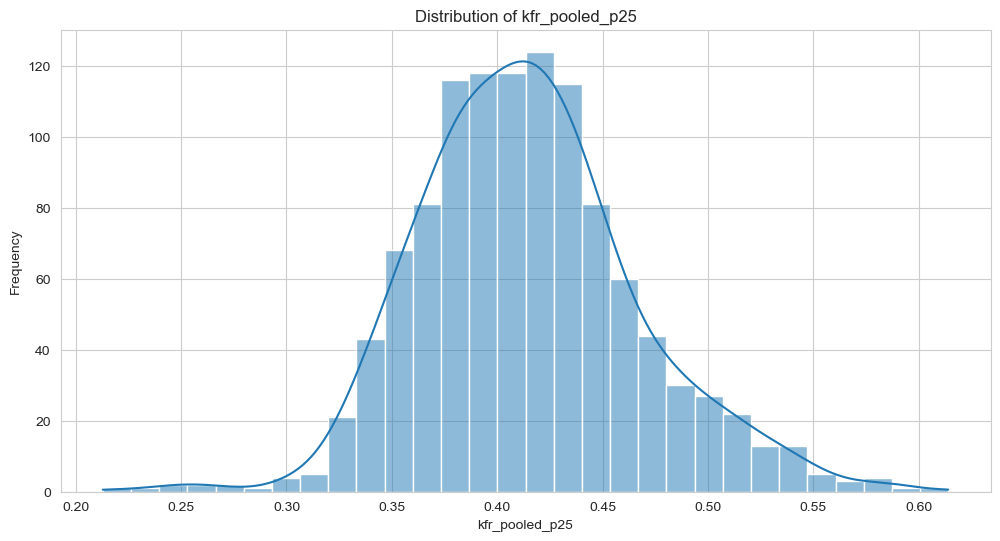

In [67]:
### Get a sense of the underlying structure of the set of 10 predictors and preprocess the data
## Inspect the distribution of the target variable
# The distribution of "kfr_pooled_p25" appears to be mostly bell-shaped with a slight right skew
# This is a good sign for linear regression, as a normal-like distribution of the dependent variable often leads to better model performance

plt.figure(figsize=(12, 6))

sns.histplot(cb['kfr_pooled_p25'], bins=30, kde=True)
plt.title('Distribution of kfr_pooled_p25')
plt.xlabel('kfr_pooled_p25')
plt.ylabel('Frequency')

plt.show()

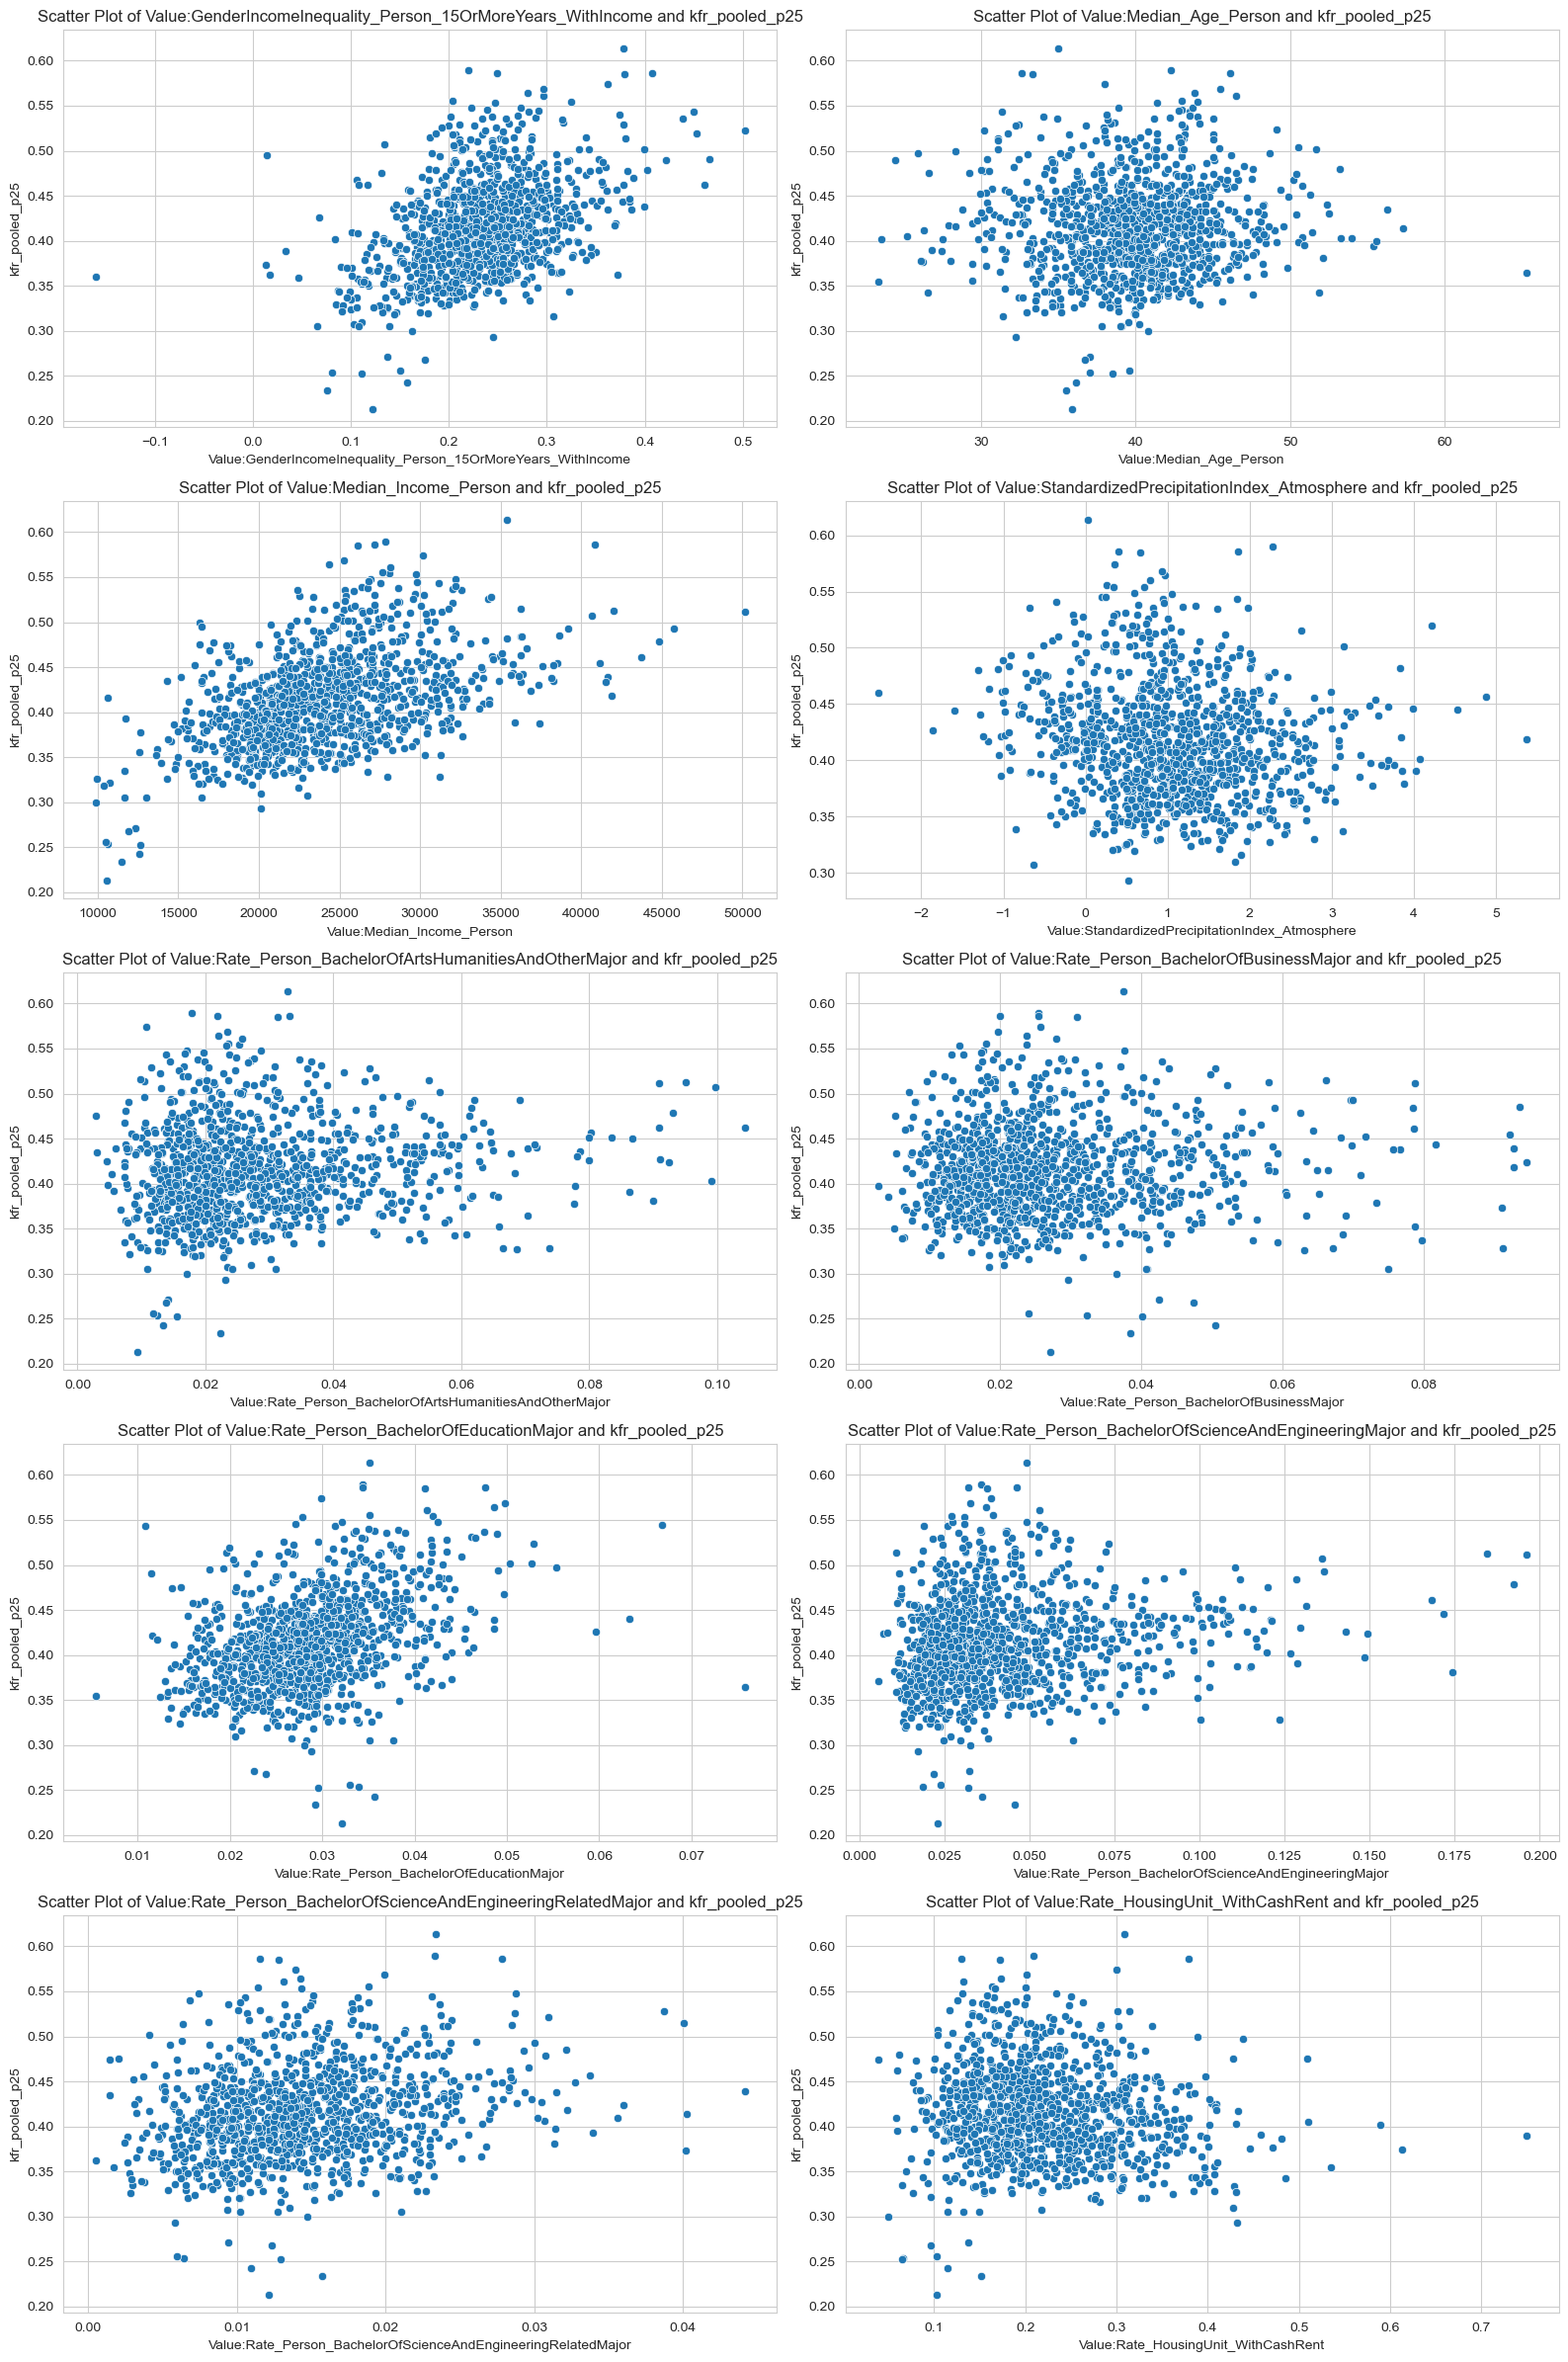

In [68]:
### Get a sense of the underlying structure of the set of 10 predictors and preprocess the data
## Inspect the distribution of the predictor variables
# None of these plots show a strong, clear linear trend, which suggests that simple linear regression may not be the best modeling approach for these predictors
# While a few plots exhibit some outliers, they are not too pronounced 

fig, axes = plt.subplots(5, 2, figsize=(16, 24))
axes = axes.flatten()

var_columns_10 = cb[selected_columns_10].drop(columns='kfr_pooled_p25').columns

for i, ax in enumerate(axes):
    var = var_columns_10[i]
    sns.scatterplot(x=var, y='kfr_pooled_p25', data=cb, ax=ax)
    ax.set_title(f'Scatter Plot of {var} and kfr_pooled_p25')
    ax.set_xlabel(var)
    ax.set_ylabel('kfr_pooled_p25')

plt.tight_layout()
plt.show()

In [69]:
### Get a sense of the underlying structure of the set of 10 predictors and preprocess the data
## Inspect the missing values 
# (A significant portion of the kfr_pooled_p25 values are missing because the other half of the data is in the test set)
# There are more missing values in the VSPIA., while the missing values in other two valuables are minimal

missing_values_10 = cb_selected_10.isnull().sum()
missing_values_10 = missing_values_10[missing_values_10 > 0]
missing_percentage_10 = (missing_values_10 / len(cb_selected_10)) * 100
missing_df_10 = pd.DataFrame({
    'Missing Values': missing_values_10,
    'Percentage (%)': missing_percentage_10
}).sort_values(by='Percentage (%)', ascending=False)

missing_df_10

,Missing Values,Percentage (%)
kfr_pooled_p25,1117,49.799376
Value:StandardizedPrecipitationIndex_Atmosphere,63,2.808738
Value:GenderIncomeInequality_Person_15OrMoreYears_WithIncome,2,0.089166
Value:Median_Income_Person,1,0.044583


In [70]:
### Get a sense of the underlying structure of the set of 10 predictors and preprocess the data
## Handle the missing values
# Drop rows with missing kfr_pooled_p25 values
# For the other variables, given the observed concentrations and potential skewness for the majority of the scatter plots, the median appears to be a more suitable measure for imputing missing values

cb_selected_cleaned_10 = cb_selected_10.dropna(subset=['kfr_pooled_p25'])
cb_selected_cleaned_10 = cb_selected_cleaned_10.fillna(cb_selected_cleaned_10.median())
missing_values_final_10 = cb_selected_cleaned_10.isnull().sum()
missing_values_final_10 = missing_values_final_10[missing_values_final_10 > 0]
missing_values_final_10

Series([], dtype: int64)

In [71]:
### Get a sense of the underlying structure of the set of 10 predictors and preprocess the data
## Identify potential outliers using Z-score method

df_zscore_10 = cb_selected_cleaned_10.apply(zscore)
outliers_10 = (df_zscore_10.abs() > 3).sum()
outliers_10

kfr_pooled_p25                                                   12
Value:GenderIncomeInequality_Person_15OrMoreYears_WithIncome     12
Value:Median_Age_Person                                           9
Value:Median_Income_Person                                       11
Value:StandardizedPrecipitationIndex_Atmosphere                   9
Value:Rate_Person_BachelorOfArtsHumanitiesAndOtherMajor          20
Value:Rate_Person_BachelorOfBusinessMajor                        19
Value:Rate_Person_BachelorOfEducationMajor                        8
Value:Rate_Person_BachelorOfScienceAndEngineeringMajor           18
Value:Rate_Person_BachelorOfScienceAndEngineeringRelatedMajor     9
Value:Rate_HousingUnit_WithCashRent                               9
dtype: int64

In [72]:
### Experiment with linear regression (Non-PCA outlier-excluded model)
## Run the linear regression without outliers
# Due to the lack of sufficient context, I simply made the decision by comparing the results from running the linear regression with and without outliers in order to handle the outliers.

df_no_outliers_10 = cb_selected_cleaned_10[(df_zscore_10.abs() <= 3).all(axis=1)]
X_10no = df_no_outliers_10.drop(columns='kfr_pooled_p25')
y_10no = df_no_outliers_10['kfr_pooled_p25']
X_10no = sm.add_constant(X_10no)
lin_reg_10no = sm.OLS(y_10no, X_10no).fit()

print(lin_reg_10no.summary())

y_pred_10no = lin_reg_10no.predict(X_10no)

r2_10no = r2_score(y_10no, y_pred_10no)
adj_r2_10no = 1 - (1-r2_10no)*(len(y_10no)-1)/(len(y_10no)-X_10no.shape[1]-1)
mse_10no = mean_squared_error(y_10no, y_pred_10no)
mae_10no = mean_absolute_error(y_10no, y_pred_10no)
rse_10no = np.sqrt(mse_10no)

print(f'R^2: {r2_10no}')
print(f'Adj. R^2: {adj_r2_10no}')
print(f'MSE: {mse_10no}')
print(f'MAE: {mae_10no}')
print(f'RSE: {rse_10no}')

                            OLS Regression Results                            
Dep. Variable:         kfr_pooled_p25   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     97.17
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          1.55e-140
Time:                        11:12:31   Log-Likelihood:                 1993.3
No. Observations:                1026   AIC:                            -3965.
Df Residuals:                    1015   BIC:                            -3910.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [73]:
### Experiment with linear regression (Non-PCA outlier-included model)
## Run the linear regression with outliers
# After experimenting with the two models, one with outliers and one without, there is no significant change in the models' performance
# Since the outliers have minimal impact on the model, it is acceptable to either remove or retain them
# Therefore, I will conduct further analysis of the set of 10 predictors, including outliers

X2_10with = cb_selected_cleaned_10.drop(columns='kfr_pooled_p25')
y2_10with = cb_selected_cleaned_10['kfr_pooled_p25']
X2_10with = sm.add_constant(X2_10with)
lin_reg_10with = sm.OLS(y2_10with, X2_10with).fit()

print(lin_reg_10with.summary())

y2_pred_10with = lin_reg_10with.predict(X2_10with)

r2_10with = r2_score(y2_10with, y2_pred_10with)
adj_r2_10with = 1 - (1-r2_10with)*(len(y2_10with)-1)/(len(y2_10with)-X2_10with.shape[1]-1)
mse_10with = mean_squared_error(y2_10with, y2_pred_10with)
mae_10with = mean_absolute_error(y2_10with, y2_pred_10with)
rse_10with = np.sqrt(mse_10with)

print(f'R^2: {r2_10with}')
print(f'Adj. R^2: {adj_r2_10with}')
print(f'MSE: {mse_10with}')
print(f'MAE: {mae_10with}')
print(f'RSE: {rse_10with}')

                            OLS Regression Results                            
Dep. Variable:         kfr_pooled_p25   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     112.6
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          2.66e-161
Time:                        11:12:32   Log-Likelihood:                 2120.1
No. Observations:                1126   AIC:                            -4218.
Df Residuals:                    1115   BIC:                            -4163.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [74]:
### Get a sense of the underlying structure of the set of 10 predictors and preprocess the data
## Inspect multicollinearity using VIF method
# While the 'const' term has a very high VIF, this might not be a problem depending on the context
# For the other variables, the VIFs are mostly below 10, with only a couple of variables slightly above 5

X_const_10 = sm.add_constant(cb_selected_cleaned_10)

vif_data_10 = pd.DataFrame()
vif_data_10["feature"] = X_const_10.columns
vif_data_10["VIF"] = [variance_inflation_factor(X_const_10.values, i) for i in range(len(X_const_10.columns))]

vif_data_sorted_10 = vif_data_10.sort_values(by="VIF", ascending=False)
vif_data_sorted_10.head(10)

,feature,VIF
0,const,281.485329
9,Value:Rate_Person_BachelorOfScienceAndEngineer...,5.948565
6,Value:Rate_Person_BachelorOfArtsHumanitiesAndO...,5.767734
7,Value:Rate_Person_BachelorOfBusinessMajor,3.260051
4,Value:Median_Income_Person,2.862011
10,Value:Rate_Person_BachelorOfScienceAndEngineer...,2.852620
11,Value:Rate_HousingUnit_WithCashRent,2.047308
1,kfr_pooled_p25,2.009695
3,Value:Median_Age_Person,1.747693
8,Value:Rate_Person_BachelorOfEducationMajor,1.676368


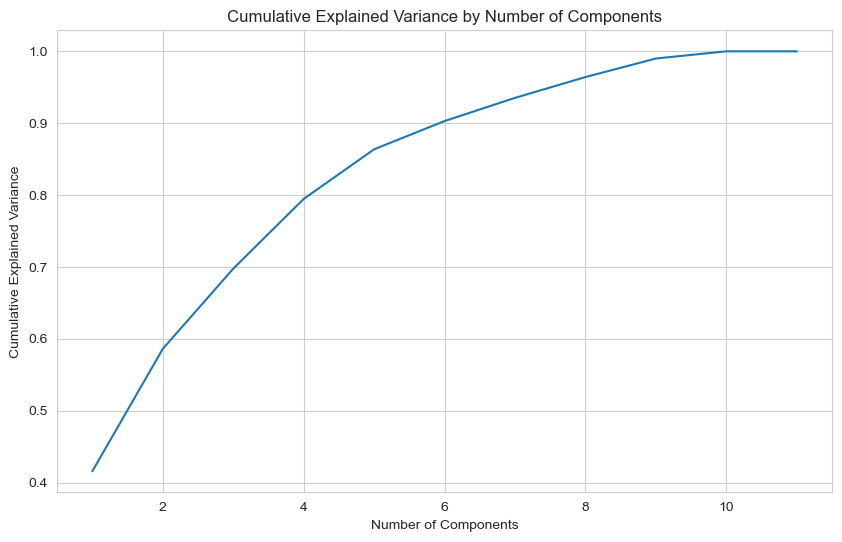

(8,
 array([0.41557248, 0.58589669, 0.69747615, 0.79456217, 0.86366344,
        0.90295289, 0.93522157, 0.96417871]))

In [75]:
### Get a sense of the underlying structure of the set of 10 predictors and preprocess the data
## Standardize the variables and Apply PCA
# I didn't choose to remove variables (such as by using feature engineering techniques) as the questions did not specify whether reducing variables is permissible
# Another way to enhance predictions and address multicollinearity is through Principal Component Analysis (PCA)
# While PCA can reduce a model's interpretability and does not always enhance model performance, let's try it to see how it works

scaler = StandardScaler()
X_scaled_10 = scaler.fit_transform(X2_10with)

pca = PCA()
X_pca_10 = pca.fit_transform(X_scaled_10)

cumulative_variance_10 = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.where(cumulative_variance_10 >= 0.95)[0][0] + 1

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_10) + 1), cumulative_variance_10)
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

n_components_95, cumulative_variance_10[:n_components_95]

In [76]:
### Experiment with linear regression (PCA model with outliers included)
## Make predictions using the first 8 principal components that explain at least 95% of the variance
# Based on pre-PCA and post-PCA metrics, the PCA doesn't enhance the model performance, though the condition number is greatly reduced
# The decrease in both R-squared and Adj. R-squared alongside increased error metrics (MSE, MAE, and RSE) suggests that 
# the principal components used don't capture enough of the variability in the data that is relevant for predicting the outcome variable as effectively as the original data set
# While a lower condition number is indicative of a model that has potentially addressed multicollinearity, it does not guarantee a better model
# The final choice of model should be based on a holistic evaluation of model performance
# Hence, the Non-PCA outlier-included model statistically outperforms the PCA model with outliers included

X_pca_reduced_10 = X_pca_10[:, :n_components_95]
y3_10 = cb_selected_cleaned_10['kfr_pooled_p25'].values
X_pca_reduced_10 = sm.add_constant(X_pca_reduced_10)
lin_reg_pca_10 = sm.OLS(y3_10, X_pca_reduced_10).fit()

print(lin_reg_pca_10.summary())

y3_pred_10 = lin_reg_pca_10.predict(X_pca_reduced_10)

r2_pca_10 = r2_score(y3_10, y3_pred_10)
adj_r2_pca_10 = 1 - (1-r2_pca_10)*(len(y3_10)-1)/(len(y3_10)-X_pca_reduced_10.shape[1]-1)
mse_pca_10 = mean_squared_error(y3_10, y3_pred_10)
mae_pca_10 = mean_absolute_error(y3_10, y3_pred_10)
rse_pca_10 = np.sqrt(mse_pca_10)

print(f'R^2: {r2_pca_10}')
print(f'Adj. R^2: {adj_r2_pca_10}')
print(f'MSE: {mse_pca_10}')
print(f'MAE: {mae_pca_10}')
print(f'RSE: {rse_pca_10}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     110.7
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          6.03e-136
Time:                        11:12:35   Log-Likelihood:                 2055.9
No. Observations:                1126   AIC:                            -4094.
Df Residuals:                    1117   BIC:                            -4049.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4145      0.001    355.415      0.0

### Part 2: Prediction Challenge

#### 8. Run a linear regression of krf_pooled_p25 on the full predictor set (consisting of the 10 predictors you chose from DataCommons and the 121 predictors included in the training data).  Interpret one of the coefficients.  Obtain predictions of kfr_pooled_p25.

After experimenting with several linear regression models — with and without outliers, and with and without PCA — as shown in the code blocks and outputs below, I chose non-PCA outlier-excluded model to inspect the results.

The OLS regression results indicate:
  
- R-squared (0.878)
- Adj. R-squared (0.860)
- F-statistic (49.03)
- Coefficients (Top 5 significant positive predictors include `P_26` Fraction of Residents w/ a College Degree or More in 2000, `P_32` Share Below Poverty Line 2000, `Value:GenderIncomeInequality_Person_15OrMoreYears_WithIncome`, `P_47` Employment Rate 2000, `P_46` Share of Working Adults w/ Commute Time of 15 Minutes Or Less in 2006‐2010 ACS. Top 5 significant negative predictors are the `Value:Rate_Person_BachelorOfScienceAndEngineeringMajor`, `P_45` Share of Single‐Headed Households with Children 2000, `P_49` Log wage growth for HS Grad., 2005‐2014, `P_56` Mentally Unhealthy Days per Month (Persons 18 Years and Over), `P_10` % of Individuals Earning < 138% of the FPL without Insurance in 2013. The presence of multicollinearity suggests caution in interpreting individual coefficients. Further analysis would be required to address this issue.)
- P-values (a number of predictors have p-values greater than 0.05)
- Durbin-Watson statistic (1.908)
- Skew (-0.015)
- Kurtosis (3.245)

Comments:
  
*Statistical Significance* 
  
- The F-statistic of 49.03 with an associated p-value of essentially 0 suggests that the statistical test has found strong evidence to indicate that the group means are not all equal. It implies that the differences observed are statistically significant and unlikely to be due to random chance.
  
*Goodness-of-Fit*
  
- The R-squared value is 0.878, which means that approximately 87.8% of the variance in the dependent variable can be explained by the model. This is a high R-squared value and suggests a good fit. The adjusted R-squared value is 0.860, which adjusts for the number of predictors in the model and is also high, confirming that the model fits the data well.
  
*Predictive Power*

- A high R-squared value suggests that the model has good predictive power. However, the true test of predictive power is how well the model performs on new, unseen data.
  
*Limitations*

- The large condition number (1.75e+09), suggesting potential multicollinearity, can make the interpretation of individual coefficients problematic.
- The model includes many predictors (131), which is a lot more than the PCA model. This increases the risk of overfitting and may reduce the model's generalizability. With many predictors, the risk of Type I error (false positives) increases, and some predictors may appear significant by chance.
  
*Practical Implications*

- Statistically significant predictors with larger coefficients might be areas where policy interventions or further research could be focused to understand their impact on kfr_pooled_p25. For example, a significant positive coefficient for P_26 suggests that increasing the proportion of residents with a college degree could have a positive impact on the dependent variable. Similarly, a significant negative coefficient for P_45 suggests that reducing the share of single-headed households with children might be associated with an increase in the dependent variable. It is also important to consider the practical significance of the predictors, which involves understanding the actual impact in the real-world context, not just whether an effect exists statistically.
- While the model shows a good fit statistically, one must be cautious about its practical application due to potential multicollinearity and overfitting. Further model diagnostics, validation on test data, and consideration of practical significance are necessary to ensure the robustness and applicability of the model's findings.
  
Here are the in-sample predictions of kfr_pooled_p25 using the full set for the first five observations:
  
- [0.371851 0.413179 0.396186 0.360396 0.368280]

In [77]:
### Prepare the data for the full set

value_columns = [col for col in cb.columns if "Value:" in col]
p_columns = [col for col in cb.columns if "P_" in col]
selected_columns = ['kfr_pooled_p25'] + value_columns + p_columns
cb_selected = cb[selected_columns]

cb_selected.describe()

,kfr_pooled_p25,Value:GenderIncomeInequality_Person_15OrMoreYears_WithIncome,Value:Median_Age_Person,Value:Median_Income_Person,Value:StandardizedPrecipitationIndex_Atmosphere,Value:Rate_Person_BachelorOfArtsHumanitiesAndOtherMajor,Value:Rate_Person_BachelorOfBusinessMajor,Value:Rate_Person_BachelorOfEducationMajor,Value:Rate_Person_BachelorOfScienceAndEngineeringMajor,Value:Rate_Person_BachelorOfScienceAndEngineeringRelatedMajor,...,P_112,P_113,P_114,P_115,P_116,P_117,P_118,P_119,P_120,P_121
count,1126.000000,2241.000000,2243.000000,2242.000000,2180.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,...,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000
mean,0.414503,0.232215,40.091306,24117.000000,1.041839,0.028840,0.026920,0.028858,0.043025,0.014574,...,0.661080,15.567237,0.492408,1.683895,0.226969,5.029752,0.598085,1.019889,1.066445,0.131692
std,0.052216,0.061199,4.790646,5492.881031,0.969349,0.017056,0.014627,0.007406,0.027876,0.006146,...,2.414832,14.002106,1.507687,3.062350,0.898290,5.526860,2.089347,2.988254,2.733203,1.038655
min,0.212865,-0.160444,22.300000,9399.000000,-2.527996,0.002895,0.002493,0.005495,0.005404,0.000540,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379837,0.196398,37.400000,20782.250000,0.408913,0.017396,0.017052,0.023977,0.025015,0.010147,...,0.000000,5.130000,0.000000,0.000000,0.000000,1.075000,0.000000,0.000000,0.000000,0.000000
50%,0.411379,0.232735,40.300000,23626.500000,0.981154,0.024278,0.023359,0.028338,0.035495,0.013755,...,0.000000,12.500000,0.000000,0.000000,0.000000,4.170000,0.000000,0.000000,0.000000,0.000000
75%,0.443173,0.268950,42.900000,26855.500000,1.619809,0.035690,0.033120,0.033140,0.052734,0.018285,...,0.000000,22.730000,0.000000,2.335000,0.000000,7.100000,0.000000,0.625000,0.665000,0.000000
max,0.614030,0.501838,65.300000,61012.000000,5.368511,0.156940,0.117855,0.075735,0.294288,0.050355,...,30.770000,87.500000,33.330002,26.090000,15.000000,100.000000,22.219999,33.330002,42.860001,25.000000


In [78]:
### Get a sense of the underlying structure of the full set and preprocess the data
## Inspect the missing values 
# (A significant portion of the kfr_pooled_p25 values are missing because the other half of the data is in the test set)
# There are more missing values in the VSPIA., while the missing values in other two valuables are minimal

missing_values = cb_selected.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_percentage = (missing_values / len(cb_selected)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Percentage (%)', ascending=False)

missing_df

,Missing Values,Percentage (%)
kfr_pooled_p25,1117,49.799376
Value:StandardizedPrecipitationIndex_Atmosphere,63,2.808738
Value:GenderIncomeInequality_Person_15OrMoreYears_WithIncome,2,0.089166
Value:Median_Income_Person,1,0.044583


In [79]:
### Get a sense of the underlying structure of the full set and preprocess the data
## Handle the missing values
# Drop rows with missing kfr_pooled_p25 values
# For the other variables, given the observed concentrations and potential skewness for the majority of the scatter plots, the median appears to be a more suitable measure for imputing missing values

cb_selected_cleaned = cb_selected.dropna(subset=['kfr_pooled_p25'])
cb_selected_cleaned = cb_selected_cleaned.fillna(cb_selected.median())
missing_values_final = cb_selected_cleaned.isnull().sum()
missing_values_final = missing_values_final[missing_values_final > 0]
missing_values_final

Series([], dtype: int64)

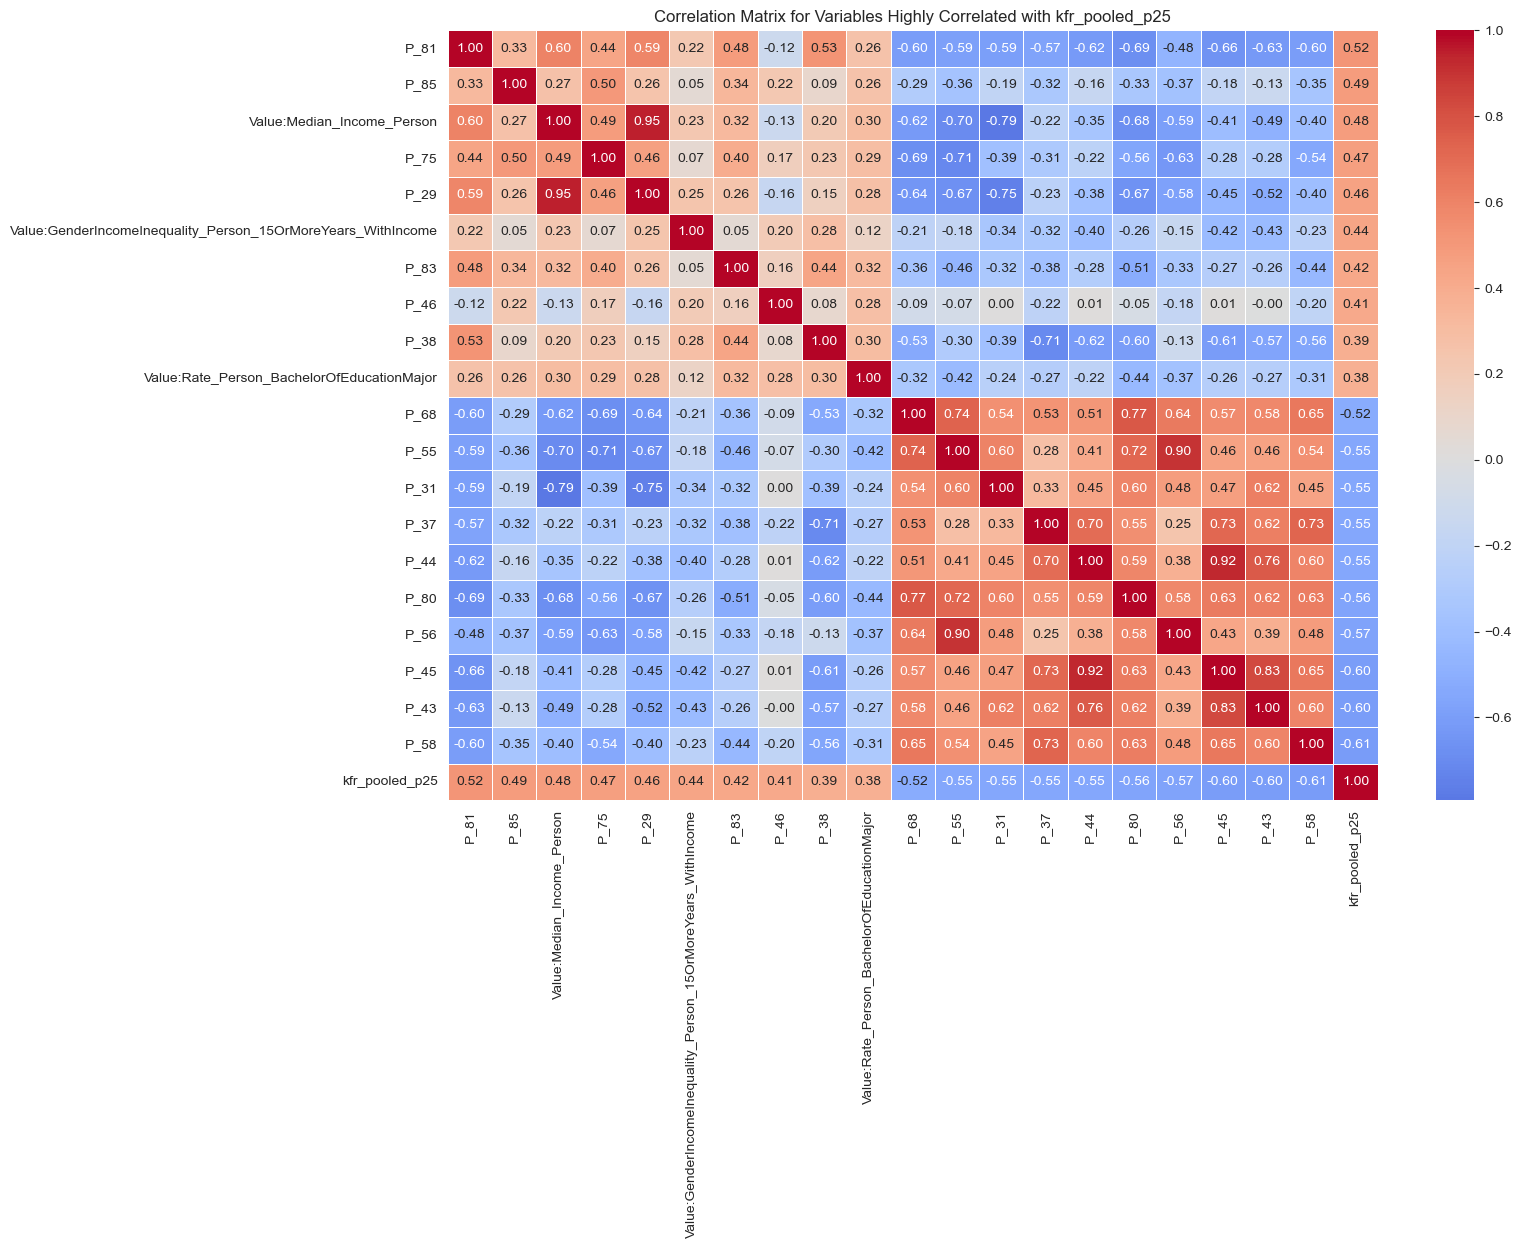

In [80]:
### Get a sense of the underlying structure of the full set and preprocess the data
## Inspect the correlation coefficient and identify multicollinearity

correlation_matrix = cb_selected_cleaned.corr()
correlations_with_target = correlation_matrix['kfr_pooled_p25'].sort_values(ascending=False)
top_10_corr = correlations_with_target.head(11)[1:]  
bottom_10_corr = correlations_with_target.tail(10)
selected_vars = top_10_corr.index.tolist() + bottom_10_corr.index.tolist() + ['kfr_pooled_p25']
selected_corr_matrix = cb_selected_cleaned[selected_vars].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix for Variables Highly Correlated with kfr_pooled_p25')
plt.show()

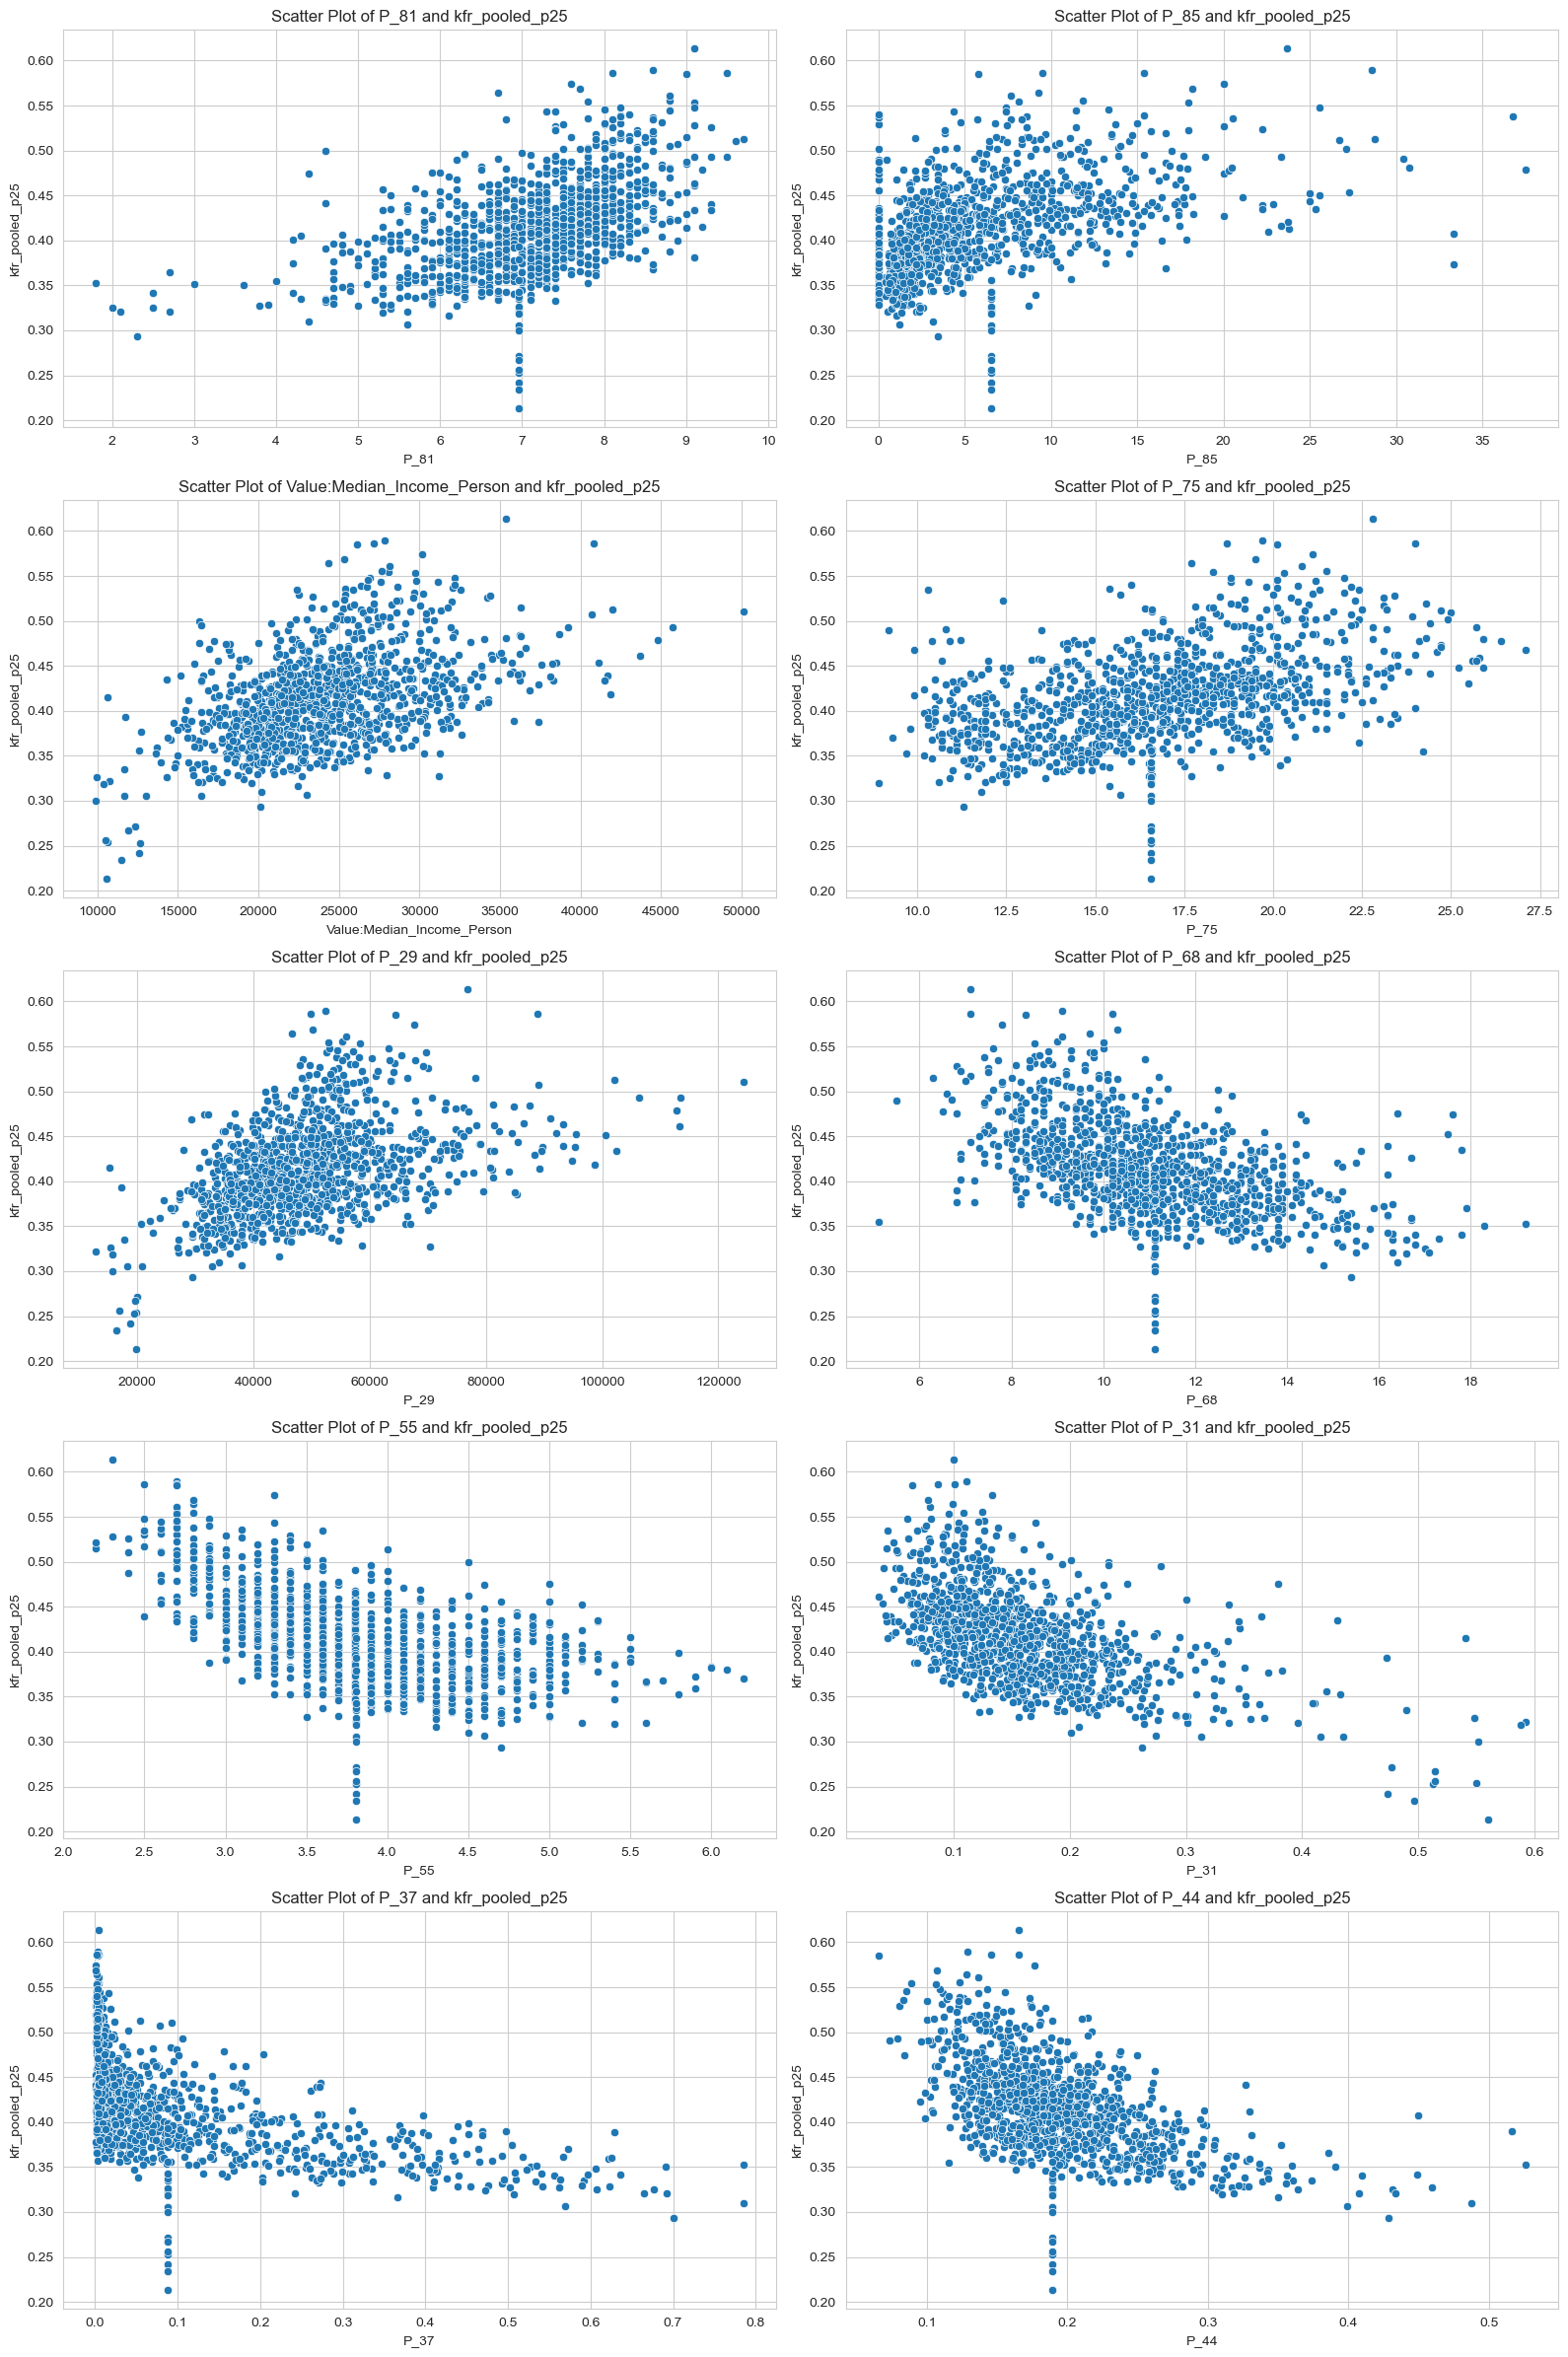

In [81]:
### Get a sense of the underlying structure of the full set and preprocess the data
## Assess the linearity of the relationships of top 5 positively and top 5 negatively correlated variables

selected_vars = top_10_corr.index.tolist()[:5] + bottom_10_corr.index.tolist()[:5]
fig, axes = plt.subplots(5, 2, figsize=(16, 24))
axes = axes.flatten()

for i, var in enumerate(selected_vars):
    sns.scatterplot(x=var, y='kfr_pooled_p25', data=cb_selected_cleaned, ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {var} and kfr_pooled_p25')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('kfr_pooled_p25')

plt.tight_layout()
plt.show()

In [82]:
### Get a sense of the underlying structure of the full set and preprocess the data
## Identify potential outliers using Z-score method

df_zscore = cb_selected_cleaned[selected_vars + ['kfr_pooled_p25']].apply(zscore)
outliers = (df_zscore.abs() > 3).sum()
outliers

P_81                          12
P_85                          22
Value:Median_Income_Person    11
P_75                           1
P_29                          16
P_68                           7
P_55                           6
P_31                          23
P_37                          27
P_44                          15
kfr_pooled_p25                12
dtype: int64

In [84]:
### Experiment with linear regression (Non-PCA outlier-excluded model)
## Run the linear regression without outliers
# Due to the lack of sufficient context, I simply made the decision by comparing the results from running the linear regression with and without outliers in order to handle the outliers

df_no_outliers = cb_selected_cleaned[(df_zscore.abs() <= 3).all(axis=1)]
value_columns = [col for col in df_no_outliers.columns if "Value:" in col]
p_columns = [col for col in df_no_outliers.columns if "P_" in col]
selected_columns = value_columns + p_columns

X = df_no_outliers[selected_columns]
y = df_no_outliers['kfr_pooled_p25']
X = sm.add_constant(X)
lin_reg = sm.OLS(y, X).fit()

print(lin_reg.summary())

y_pred = lin_reg.predict(X)

r2_no_outliers = r2_score(y, y_pred)
adj_r2_no_outliers = 1 - (1-r2_no_outliers)*(len(y)-1)/(len(y)-X.shape[1]-1)
mse_no_outliers = mean_squared_error(y, y_pred)
mae_no_outliers = mean_absolute_error(y, y_pred)
rse_no_outliers = np.sqrt(mse_no_outliers)

print(f'R^2: {r2_no_outliers}')
print(f'Adj. R^2: {adj_r2_no_outliers}')
print(f'MSE: {mse_no_outliers}')
print(f'MAE: {mae_no_outliers}')
print(f'RSE: {rse_no_outliers}')

                            OLS Regression Results                            
Dep. Variable:         kfr_pooled_p25   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     49.03
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:13:03   Log-Likelihood:                 2756.3
No. Observations:                1021   AIC:                            -5249.
Df Residuals:                     889   BIC:                            -4598.
Df Model:                         131                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [85]:
## Obtain the most significant coefficients for the final analysis model in the full set

coefs = lin_reg.params
p_values = lin_reg.pvalues
coefs_p_values = pd.DataFrame({'coef': coefs, 'p_value': p_values}).drop('const')
significant_coefs = coefs_p_values[coefs_p_values['p_value'] < 0.05]
top_pos_coefs = significant_coefs[significant_coefs['coef'] > 0].sort_values(by='coef', ascending=False).head(5)
top_neg_coefs = significant_coefs[significant_coefs['coef'] < 0].sort_values(by='coef', ascending=True).head(5)

print("Top 5 Positive Significant Coefficients:")
print(top_pos_coefs)
print("\nTop 5 Negative Significant Coefficients:")
print(top_neg_coefs)

Top 5 Positive Significant Coefficients:
                                                        coef       p_value
P_26                                                0.220811  8.318581e-07
P_32                                                0.204944  1.514107e-06
Value:GenderIncomeInequality_Person_15OrMoreYea...  0.068383  8.709187e-07
P_47                                                0.057621  2.841712e-03
P_46                                                0.037917  1.724048e-03

Top 5 Negative Significant Coefficients:
                                                        coef       p_value
Value:Rate_Person_BachelorOfScienceAndEngineeri... -0.435819  1.461405e-06
P_45                                               -0.222863  1.247271e-09
P_49                                               -0.018195  4.047459e-03
P_56                                               -0.015676  2.403265e-05
P_10                                               -0.006459  3.391754e-02


In [86]:
## Obtain predictions of kfr_pooled_p25 for the final analysis model in the full set

print(y_pred[:5])

0    0.371851
1    0.413179
2    0.396186
3    0.360396
4    0.368280
dtype: float64


In [87]:
### Experiment with linear regression (Non-PCA outlier-included model)
## Run the linear regression with outliers
# After experimenting with the two models, one with outliers and one without, model performance was enhanced after excluding outliers
# Therefore, I will conduct further analysis without outliers

value_columns_outliers = [col for col in cb_selected_cleaned.columns if "Value:" in col]
p_columns_outliers = [col for col in cb_selected_cleaned.columns if "P_" in col]
selected_columns_outliers = value_columns_outliers + p_columns_outliers

X2 = cb_selected_cleaned[selected_columns]
y2 = cb_selected_cleaned['kfr_pooled_p25']
X2 = sm.add_constant(X2)
lin_reg2 = sm.OLS(y2, X2).fit()

print(lin_reg2.summary())

y2_pred = lin_reg2.predict(X2)

r2_with = r2_score(y2, y2_pred)
adj_r2_with = 1 - (1-r2_with)*(len(y2)-1)/(len(y2)-X2.shape[1]-1)
mse_with = mean_squared_error(y2, y2_pred)
mae_with = mean_absolute_error(y2, y2_pred)
rse_with = np.sqrt(mse_with)

print(f'R^2: {r2_with}')
print(f'Adj. R^2: {adj_r2_with}')
print(f'MSE: {mse_with}')
print(f'MAE: {mae_with}')
print(f'RSE: {rse_with}')

                            OLS Regression Results                            
Dep. Variable:         kfr_pooled_p25   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     54.77
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:13:07   Log-Likelihood:                 2913.0
No. Observations:                1126   AIC:                            -5562.
Df Residuals:                     994   BIC:                            -4899.
Df Model:                         131                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [88]:
### Get a sense of the underlying structure of the full set and preprocess the data
## Inspect multicollinearity using VIF method
# Given that all the VIFs listed are well above 10, it's likely that there are significant multicollinearity issues
# In practical terms, this means: High multicollinearity renders variable coefficients unreliable, inflates standard errors—reducing statistical power—and risks model overfitting, capturing noise instead of actual patterns

X_const = sm.add_constant(cb_selected_cleaned)

vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(len(X_const.columns))]

vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
vif_data_sorted.head(50)

,feature,VIF
0,const,3.588181e+08
105,P_94,9.753392e+06
108,P_97,6.614680e+06
106,P_95,3.619658e+06
28,P_17,3.361257e+06
93,P_82,3.068480e+06
110,P_99,1.899065e+06
94,P_83,1.730061e+06
23,P_12,1.606438e+06
98,P_87,9.819767e+05


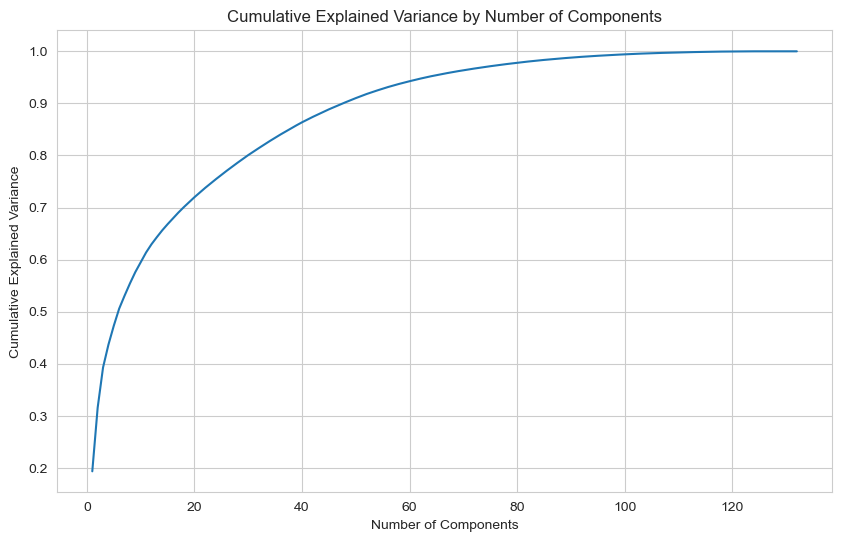

(64,
 array([0.19369802, 0.31584997, 0.39300288, 0.43675133, 0.47321546,
        0.50601042, 0.5307823 , 0.55430168, 0.57618486, 0.59506609,
        0.6137794 , 0.6295169 , 0.64318455, 0.65625154, 0.66808619,
        0.67934678, 0.69034096, 0.70065527, 0.71043552, 0.71998186,
        0.72897275, 0.73789886, 0.74641052, 0.75466876, 0.76273315,
        0.77071734, 0.77847131, 0.78604166, 0.79344271, 0.80079295,
        0.80769734, 0.81444415, 0.82113343, 0.82772414, 0.83414989,
        0.84033957, 0.84633041, 0.85224249, 0.85812424, 0.86374299,
        0.86902001, 0.87411901, 0.87902876, 0.88386192, 0.88863216,
        0.89307658, 0.89748278, 0.90183355, 0.90604818, 0.91018352,
        0.91414675, 0.91800741, 0.92154304, 0.92495503, 0.92828219,
        0.93146134, 0.93439997, 0.93729191, 0.93999341, 0.9426041 ,
        0.94516176, 0.94759972, 0.94992404, 0.95215232]))

In [89]:
### Get a sense of the underlying structure of the full set and preprocess the data
## Standardize the variables and Apply PCA
# I didn't choose to remove variables (such as by using feature engineering techniques) because the questions did not specify whether reducing variables is permissible
# Another way to enhance predictions and address multicollinearity is through Principal Component Analysis (PCA)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_no_outliers)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

n_components_95, cumulative_variance[:n_components_95]

In [90]:
### Experiment with linear regression (PCA model with outliers included)
## Make predictions using the first 64 components that explain at least 95% of the variance
# The model using PCA outperforms the one without PCA, indicating a higher explained variance and lower prediction errors
# However, for practical interpretation and considering PCA's ineffectiveness for some medthods like tree-based methods,
# I will conduct further analysis of the full set, excluding outliers and not using PCA

X_pca_reduced = X_pca[:, :n_components_95]
y3 = df_no_outliers['kfr_pooled_p25'].values
X_pca_reduced = sm.add_constant(X_pca_reduced)
lin_reg_pca = sm.OLS(y3, X_pca_reduced).fit()

print(lin_reg_pca.summary())

y3_pred = lin_reg_pca.predict(X_pca_reduced)

r2_pca = r2_score(y3, y3_pred)
adj_r2_pca = 1 - (1-r2_pca)*(len(y3)-1)/(len(y3)-X_pca_reduced.shape[1]-1)
mse_pca = mean_squared_error(y3, y3_pred)
mae_pca = mean_absolute_error(y3, y3_pred)
rse_pca = np.sqrt(mse_pca)

print(f'R^2: {r2_pca}')
print(f'Adj. R^2: {adj_r2_pca}')
print(f'MSE: {mse_pca}')
print(f'MAE: {mae_pca}')
print(f'RSE: {rse_pca}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     145.6
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:13:10   Log-Likelihood:                 2893.0
No. Observations:                1021   AIC:                            -5656.
Df Residuals:                     956   BIC:                            -5336.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4163      0.000    904.433      0.0

#### 9. Implement a decision tree on the full predictor set using 10 fold cross-validation to select the optimal tree size.  What is the first split? Discuss why the first split is often an important predictor or correlate of the outcome.

The optimal tree size for the decision tree is 5.

The first split in the optimal decision tree is made based on the predictor `P_57` (Percent of Adults That Report Fair or Poor Health (Persons 18 Years and Over) . Specifically, the split occurs at a threshold of approximately 14.75.

The first split of a decision tree is often considered important for several reasons: The first split in a decision tree is the one that reduces outcome variability the most, indicating a strong association with the target variable. It affects the largest subset of data and sets the stage for subsequent splits, reflecting its importance in the predictive model. The top split often offers clear and immediate insight into the primary factor that influences the outcome variable.

In [93]:
### Implement a decision tree on the full set
## use 10 fold cross-validation to select the optimal tree size

kf = KFold(n_splits=10, shuffle=True, random_state=42)

avg_rmse = []

depths = list(range(1, 31))

for depth in depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    mse_scores = -cross_val_score(tree, X, y, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(mse_scores)
    avg_rmse.append(rmse_scores.mean())

optimal_depth = depths[np.argmin(avg_rmse)]
min_rmse = min(avg_rmse)

best_tree = DecisionTreeRegressor(max_depth=optimal_depth, random_state=42)
best_tree.fit(X, y)

y_pred_best_tree = best_tree.predict(X)

mse_best_tree = mean_squared_error(y, y_pred_best_tree)
r2_best_tree = r2_score(y, y_pred_best_tree)

print(f'Optimal tree depth: {optimal_depth}')
print(f'Minimum average RMSE: {min_rmse}')
print(f'MSE for optimal Decision Tree: {mse_best_tree}')
print(f'R2 for optimal Decision Tree: {r2_best_tree}')

Optimal tree depth: 5
Minimum average RMSE: 0.029281416252176277
MSE for optimal Decision Tree: 0.00046974729973050627
R2 for optimal Decision Tree: 0.7841675114924137


In [94]:
### Implement a decision tree on the full set
## Find the index and threshold used for the first split

optimal_tree = DecisionTreeRegressor(max_depth=optimal_depth, random_state=42)
optimal_tree.fit(X, y)

feature_index = optimal_tree.tree_.feature[0]
feature_name = X.columns[feature_index]
threshold = optimal_tree.tree_.threshold[0]

feature_name, threshold

('P_57', 14.75)

#### 10. You could have created a larger tree that would have had lower prediction error in this training data.  Why do we use cross-validation to select a smaller tree instead of just using as many splits as possible?

Using cross-validation to choose a smaller decision tree, instead of the largest possible one, helps us build a model that performs well not just on our current data but also on new, unseen data. Firstly, a very large tree can fit the training data too closely, capturing noise as if it were a real pattern. This can lead to mistakes when predicting new data; secondly, cross-validation tests the tree on different subsets of the data to ensure it works well in general, not just on the data it was trained on; and thirdly, smaller trees are easier to understand and manage, and often they're all you need to make good predictions. Therefore, cross-validation helps find a good middle ground — a model that's simple yet effective at making predictions.

#### 11. Implement a random forest with at least 1000 bootstrap samples and obtain predictions. 

Based on the output metrics: It seems the Random Forest regressor has been trained effectively and is providing highly accurate predictions for the full dataset. If this performance is consistent across different test sets and in a real-world scenario, it suggests that the model is well-fitted and could be a reliable tool for making predictions based on the features provided.

First five predictions: [0.36373053 0.41150519 0.39935276 0.36919808 0.35601651]

In [95]:
### Implement a random forest on the full set
# Use 1000 bootstrap samples and obtain predictions using the trained random forest

rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)
rf_regressor.fit(X, y)
rf_predictions = rf_regressor.predict(X)
mse_rf = mean_squared_error(y, rf_predictions)
r2_rf = r2_score(y, rf_predictions)

print(f'MSE for Random Forest: {mse_rf}')
print(f'R2 for Random Forest: {r2_rf}')
print(f'First five predictions: {rf_predictions[:5]}')

MSE for Random Forest: 5.343772195222946e-05
R2 for Random Forest: 0.9754472319143868
First five predictions: [0.36373053 0.41150519 0.39935276 0.36919808 0.35601651]


#### 12. Calculate and compare the mean squared error for your results on 8, 9, 11 in -sample. 

Linear Regression: 0.00026463525924545615, Decision Tree: 0.00046974729973050627, Random Forest: 5.343772195222946e-05

In sample, the Random Forest has the lowest MSE, which suggests that it has the best performance among the three in terms of error minimization. The Decision Tree has the highest MSE, indicating the poorest fit among the three. The Linear Regression's performance is in the middle of the other two.

In [96]:
### Compare MSE for all the 3 models' results in-sample

linear_reg_predictions = lin_reg.predict(X)
optimal_tree = DecisionTreeRegressor(max_depth=5)
optimal_tree.fit(X, y)
decision_tree_predictions = optimal_tree.predict(X)

mse_linear_reg = ((y - linear_reg_predictions) ** 2).mean()
mse_decision_tree = ((y - decision_tree_predictions) ** 2).mean()
mse_random_forest = ((y - rf_predictions) ** 2).mean()

mse_values = {
    'Linear Regression': mse_linear_reg,
    'Decision Tree': mse_decision_tree,
    'Random Forest': mse_random_forest
}

mse_values

{'Linear Regression': 0.0002646352592454583,
 'Decision Tree': 0.00046974729973050627,
 'Random Forest': 5.343772195222946e-05}

#### 13. Briefly comment on whether or not you think your regression from question 8, question 9 or from question 11 will predict krf_pooled_p25 better out-of-sample. 

Here's a brief evaluation:

- OLS Regression Model: It has an R-squared of 0.878 and a potential issue with multicollinearity, given the large condition number. High multicollinearity can affect the stability of the coefficient estimates, which may lead to poorer out-of-sample performance. If the model is overfit to the in-sample data, it may not generalize well to new data.
- Decision Tree Model: The optimal tree depth was found to be 5, which suggests the model is not overly complex. It has an R-squared of 0.784, which is lower than the OLS model, indicating it may not capture as much of the variance in the training data. However, because it's less complex, it might generalize better and could be more robust to out-of-sample data than a highly parameterized OLS model.
- Random Forest Model: This model showed an R-squared of 0.975, which is very high, and a very low MSE. While Random Forest models are less likely to overfit compared to individual decision trees due to their ensemble nature, there's still a risk of overfitting if the model is too complex or if the hyperparameters are not tuned appropriately.

### Part 3: Out-of-sample validation

#### 14. Now turn to the test data set.  Calculate the mean squared error for your results from 8, 9, and 11 out-of-sample.  

Linear Regression: 0.0002765328298568708, Decision Tree: 0.0007590081564404664, Random Forest: 0.00029013203028211256

In [120]:
### Prepare the data for the test set

# Load the test dataset
test_data = pd.read_stata("atlas_test.dta")

In [121]:
cb_selected

,kfr_pooled_p25,Value:GenderIncomeInequality_Person_15OrMoreYears_WithIncome,Value:Median_Age_Person,Value:Median_Income_Person,Value:StandardizedPrecipitationIndex_Atmosphere,Value:Rate_Person_BachelorOfArtsHumanitiesAndOtherMajor,Value:Rate_Person_BachelorOfBusinessMajor,Value:Rate_Person_BachelorOfEducationMajor,Value:Rate_Person_BachelorOfScienceAndEngineeringMajor,Value:Rate_Person_BachelorOfScienceAndEngineeringRelatedMajor,...,P_113,P_114,P_115,P_116,P_117,P_118,P_119,P_120,P_121,identifier
0,0.354766,0.254326,39.6,24452.0,0.614579,0.017476,0.020764,0.013223,0.015332,0.008970,...,17.070000,2.440000,4.880000,0.000000,7.320000,0.000000,2.440000,0.000000,0.000000,12007
1,0.413865,0.227504,57.3,22990.0,0.913365,0.037296,0.032503,0.033861,0.048036,0.021324,...,11.760000,1.470000,1.470000,0.000000,4.410000,0.000000,0.000000,1.470000,0.000000,12015
2,0.394591,0.218621,55.4,20966.0,0.910775,0.023614,0.024391,0.030111,0.036523,0.018443,...,10.750000,0.000000,2.150000,0.000000,6.450000,0.000000,0.000000,1.080000,0.000000,12017
3,0.356809,0.114001,40.1,19743.0,1.399204,0.013448,0.011284,0.018354,0.016017,0.008023,...,7.500000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,12027
4,0.349491,0.160414,36.0,26729.0,0.383645,0.038129,0.047031,0.023888,0.059348,0.018524,...,15.540000,0.910000,4.200000,0.550000,4.940000,0.000000,0.550000,0.550000,0.180000,12031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,NaN,0.120096,39.1,10227.0,NaN,0.016979,0.035279,0.038348,0.027430,0.011501,...,14.844378,0.434577,1.626436,0.179833,4.692705,0.693059,0.886848,0.918874,0.118701,72115
2239,NaN,0.060818,40.2,10865.0,NaN,0.012053,0.031032,0.042684,0.026107,0.020782,...,14.844378,0.434577,1.626436,0.179833,4.692705,0.693059,0.886848,0.918874,0.118701,72121
2240,NaN,0.118058,36.5,10893.0,NaN,0.010063,0.025871,0.033888,0.029312,0.012497,...,14.844378,0.434577,1.626436,0.179833,4.692705,0.693059,0.886848,0.918874,0.118701,72123
2241,NaN,0.067963,37.6,14146.0,NaN,0.022439,0.052996,0.024446,0.031238,0.013425,...,14.844378,0.434577,1.626436,0.179833,4.692705,0.693059,0.886848,0.918874,0.118701,72137


In [122]:
### Prepare the data for the test set
## Select rows where 'kfr_pooled_p25' is missing

# Extract the 'identifier' columns from the 'cb' DataFrame
id_columns = [col for col in cb.columns if "identifier" in col]

# Merge on the 'identifier' column, ensure it exists in both DataFrames
if 'identifier' in cb.columns and 'identifier' in cb_selected.columns:
    cb_selected = cb_selected.merge(cb[id_columns], on='identifier')
else:
    print("'identifier' column not found in one of the DataFrames")

# Filter rows where 'kfr_pooled_p25' is NaN
cb_selected_cleaned_reversed = cb_selected[pd.isna(cb_selected['kfr_pooled_p25'])]

# Final DataFrame with selected and cleaned rows
cb_selected_cleaned_reversed

,kfr_pooled_p25,Value:GenderIncomeInequality_Person_15OrMoreYears_WithIncome,Value:Median_Age_Person,Value:Median_Income_Person,Value:StandardizedPrecipitationIndex_Atmosphere,Value:Rate_Person_BachelorOfArtsHumanitiesAndOtherMajor,Value:Rate_Person_BachelorOfBusinessMajor,Value:Rate_Person_BachelorOfEducationMajor,Value:Rate_Person_BachelorOfScienceAndEngineeringMajor,Value:Rate_Person_BachelorOfScienceAndEngineeringRelatedMajor,...,P_113,P_114,P_115,P_116,P_117,P_118,P_119,P_120,P_121,identifier
1126,NaN,0.222662,37.0,26984.0,0.751389,0.029873,0.034418,0.026607,0.046070,0.013901,...,13.190000,1.100000,2.200000,0.000000,4.400000,0.000000,0.000000,1.100000,0.000000,10001
1127,NaN,0.192593,37.5,32339.0,0.951620,0.044955,0.053338,0.026453,0.091827,0.021664,...,11.800000,0.560000,0.000000,0.000000,5.620000,0.560000,1.120000,0.560000,0.000000,10003
1128,NaN,0.205765,47.0,26895.0,0.865868,0.036535,0.032627,0.035867,0.053835,0.016348,...,8.260000,0.000000,0.830000,0.000000,5.790000,0.000000,0.830000,1.650000,0.000000,10005
1129,NaN,0.108767,33.7,40884.0,0.946167,0.125175,0.049792,0.017941,0.190312,0.016785,...,33.770000,0.000000,4.640000,0.660000,0.660000,0.330000,0.660000,0.000000,0.000000,11001
1130,NaN,0.119638,30.8,23418.0,0.851828,0.057183,0.029482,0.027173,0.109379,0.028305,...,20.240000,0.000000,7.140000,0.000000,1.790000,0.000000,0.000000,0.600000,0.000000,12001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,NaN,0.120096,39.1,10227.0,NaN,0.016979,0.035279,0.038348,0.027430,0.011501,...,14.844378,0.434577,1.626436,0.179833,4.692705,0.693059,0.886848,0.918874,0.118701,72115
2239,NaN,0.060818,40.2,10865.0,NaN,0.012053,0.031032,0.042684,0.026107,0.020782,...,14.844378,0.434577,1.626436,0.179833,4.692705,0.693059,0.886848,0.918874,0.118701,72121
2240,NaN,0.118058,36.5,10893.0,NaN,0.010063,0.025871,0.033888,0.029312,0.012497,...,14.844378,0.434577,1.626436,0.179833,4.692705,0.693059,0.886848,0.918874,0.118701,72123
2241,NaN,0.067963,37.6,14146.0,NaN,0.022439,0.052996,0.024446,0.031238,0.013425,...,14.844378,0.434577,1.626436,0.179833,4.692705,0.693059,0.886848,0.918874,0.118701,72137


In [123]:
### Prepare the data for the test set
# Merge datasets

test_data = test_data.rename(columns={"geoid": "identifier"})
test_data['identifier'] = test_data['identifier'].astype(str).str.replace(".0", "")
test_data_merged = cb_selected_cleaned_reversed.merge(test_data, on=["identifier"], how="inner")
test_data_merged_dropped = test_data_merged.drop(['kfr_pooled_p25', 'identifier'], axis=1)
test_data_merged_dropped

,Value:GenderIncomeInequality_Person_15OrMoreYears_WithIncome,Value:Median_Age_Person,Value:Median_Income_Person,Value:StandardizedPrecipitationIndex_Atmosphere,Value:Rate_Person_BachelorOfArtsHumanitiesAndOtherMajor,Value:Rate_Person_BachelorOfBusinessMajor,Value:Rate_Person_BachelorOfEducationMajor,Value:Rate_Person_BachelorOfScienceAndEngineeringMajor,Value:Rate_Person_BachelorOfScienceAndEngineeringRelatedMajor,Value:Rate_HousingUnit_WithCashRent,...,P_113,P_114,P_115,P_116,P_117,P_118,P_119,P_120,P_121,kfr_actual
0,0.222662,37.0,26984.0,0.751389,0.029873,0.034418,0.026607,0.046070,0.013901,0.266568,...,13.190000,1.100000,2.200000,0.000000,4.400000,0.000000,0.000000,1.100000,0.000000,0.380849
1,0.192593,37.5,32339.0,0.951620,0.044955,0.053338,0.026453,0.091827,0.021664,0.278308,...,11.800000,0.560000,0.000000,0.000000,5.620000,0.560000,1.120000,0.560000,0.000000,0.364562
2,0.205765,47.0,26895.0,0.865868,0.036535,0.032627,0.035867,0.053835,0.016348,0.131774,...,8.260000,0.000000,0.830000,0.000000,5.790000,0.000000,0.830000,1.650000,0.000000,0.381239
3,0.108767,33.7,40884.0,0.946167,0.125175,0.049792,0.017941,0.190312,0.016785,0.525908,...,33.770000,0.000000,4.640000,0.660000,0.660000,0.330000,0.660000,0.000000,0.000000,0.348817
4,0.119638,30.8,23418.0,0.851828,0.057183,0.029482,0.027173,0.109379,0.028305,0.384504,...,20.240000,0.000000,7.140000,0.000000,1.790000,0.000000,0.000000,0.600000,0.000000,0.371955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,0.120096,39.1,10227.0,NaN,0.016979,0.035279,0.038348,0.027430,0.011501,0.150177,...,14.844378,0.434577,1.626436,0.179833,4.692705,0.693059,0.886848,0.918874,0.118701,0.314206
1113,0.060818,40.2,10865.0,NaN,0.012053,0.031032,0.042684,0.026107,0.020782,0.061599,...,14.844378,0.434577,1.626436,0.179833,4.692705,0.693059,0.886848,0.918874,0.118701,0.251913
1114,0.118058,36.5,10893.0,NaN,0.010063,0.025871,0.033888,0.029312,0.012497,0.100904,...,14.844378,0.434577,1.626436,0.179833,4.692705,0.693059,0.886848,0.918874,0.118701,0.282952
1115,0.067963,37.6,14146.0,NaN,0.022439,0.052996,0.024446,0.031238,0.013425,0.116784,...,14.844378,0.434577,1.626436,0.179833,4.692705,0.693059,0.886848,0.918874,0.118701,0.328035


In [124]:
### Prepare the data for the test set
## Inspect the missing values 

missing_values_count = test_data_merged_dropped.isna().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0]
total_rows = len(test_data_merged_dropped)
missing_percentage = (columns_with_missing_values / total_rows) * 100

missing_data_df = pd.DataFrame({
    'Missing Values': columns_with_missing_values,
    'Percentage': missing_percentage
})

missing_data_df

,Missing Values,Percentage
Value:StandardizedPrecipitationIndex_Atmosphere,36,3.222919


In [125]:
### Prepare the data for the test set
## Handle the missing values 

test_data_filled = test_data_merged_dropped.fillna(test_data_merged_dropped.median())
test_missing_values_final = test_data_filled.isna().sum()
test_missing_values_final = test_missing_values_final[test_missing_values_final > 0]
test_missing_values_final

Series([], dtype: int64)

In [126]:
### Prepare the data for the test set
## Identify potential outliers using Z-score method
df_zscore_train = test_data_filled.apply(zscore)
outliers = (df_zscore_train.abs() > 3).sum()
outliers

Value:GenderIncomeInequality_Person_15OrMoreYears_WithIncome    11
Value:Median_Age_Person                                         12
Value:Median_Income_Person                                      10
Value:StandardizedPrecipitationIndex_Atmosphere                  7
Value:Rate_Person_BachelorOfArtsHumanitiesAndOtherMajor         19
                                                                ..
P_118                                                           30
P_119                                                           22
P_120                                                           21
P_121                                                           15
kfr_actual                                                       9
Length: 132, dtype: int64

In [127]:
### Prepare the data for the test set
## Handle the outliers and prepare the datasets for testing

df_no_outliers_test = test_data_filled[(df_zscore_train.abs() <= 3).all(axis=1)]
X_train = X
X_test = df_no_outliers_test.drop(columns=['kfr_actual'])
X_test.insert(0, 'const', 1)
y_test = df_no_outliers_test['kfr_actual'].values
test_data_filled_renamed = df_no_outliers_test.rename(columns={"kfr_actual": "kfr_pooled_p25"})
y_test = test_data_filled_renamed['kfr_pooled_p25'].values

In [128]:
### Calculate MSE for all the 3 models' results out-of-sample

linear_reg_test_predictions_aligned = lin_reg.predict(X_test)
decision_tree_test_predictions_aligned = optimal_tree.predict(X_test)
rf_test_predictions_aligned = rf_regressor.predict(X_test)

mse_linear_reg_test_aligned = ((y_test - linear_reg_test_predictions_aligned) ** 2).mean()
mse_decision_tree_test_aligned = ((y_test - decision_tree_test_predictions_aligned) ** 2).mean()
mse_rf_test_aligned = ((y_test - rf_test_predictions_aligned) ** 2).mean()

mse_out_of_sample_aligned = {
    'Linear Regression': mse_linear_reg_test_aligned,
    'Decision Tree': mse_decision_tree_test_aligned,
    'Random Forest': mse_rf_test_aligned
}

print(mse_out_of_sample_aligned)

{'Linear Regression': 0.0002765328298568708, 'Decision Tree': 0.0007590081564404664, 'Random Forest': 0.00029013203028211256}


#### 15. Which model did the best?  Write a one page summary of your analysis with a nicely formatted table showing the in-sample and out-of-sample mean squared error for your models estimated in questions 8, 9, and 11.  

In the empirical project aimed at forecasting the future economic status of children whose parents are in the lower quarter of national earnings, three models were tested using data from the Opportunity Atlas on counties with over 10,000 residents. The Linear Regression model scored an R-squared of 0.878 but had multicollinearity issues, casting doubt on its stability despite its interpretability and decent out-of-sample Mean Squared Error (MSE) performance. The Decision Tree was less accurate, with a lower in-sample R-squared and a higher out-of-sample MSE, though it offered simplicity and was easy to understand.

The standout was the Random Forest model, scoring an impressive in-sample R-squared of 0.975 and the lowest MSE, indicating strong fit and predictive power. It also maintained a low out-of-sample MSE, suggesting it is reliable for general use despite being complex and less interpretable. The study suggested that while Random Forest provided the best balance between accuracy and complexity, the final model choice would also need to consider the importance of interpretability to stakeholders.

The following table provides a succinct overview of the MSE outcomes for each model:

| Model             | In-Sample MSE         | Out-of-Sample MSE     |
|-------------------|-----------------------|-----------------------|
| Linear Regression | 0.00026463525924545615| 0.0002765328298568708 |
| Decision Tree     | 0.00046974729973050627| 0.0007590081564404664|
| Random Forest     | 5.343772195222946e-05 | 0.00029013203028211256|

The study reaffirms the significance of employing advanced modeling techniques to create accurate and actionable forecasts in the field of socio-economic research, highlighting their ability to decipher complex patterns, enhance predictive accuracy, and inform effective policy-making. However, it also acknowledges limitations such as potential biases, the exclusion of smaller counties, and the absence of less tangible mobility factors like social capital. Furthermore, the Random Forest model's complexity could limit its generalizability across different datasets or over time, especially in the context of changing socio-economic conditions.

In summary, the research advances our understanding of predicting intergenerational mobility but underscores the need for a clear theoretical framework to select variables, robust data quality, and the ethical use of predictive modeling in socio-economic policy. It highlights the importance of not only technical precision but also the broader implications of such forecasts on policy and equity.

#### 16. Draw some graphs or maps to visualize your predictions.

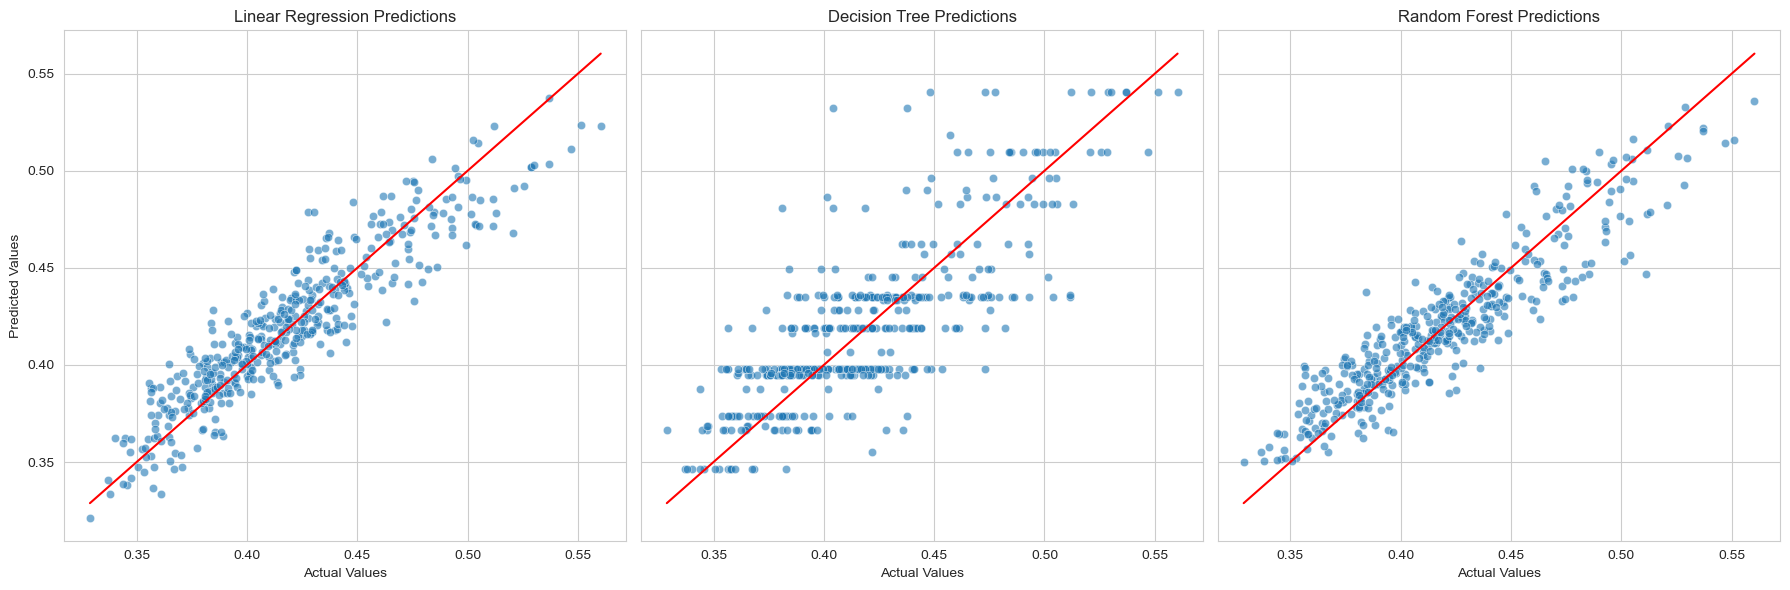

In [129]:
### Prediction visualization
## Scatter plots of the actual vs. predicted values with a fitted regression line
# Points closer to the regression line indicate better predictions

sns.set_style("whitegrid")

def plot_predictions(ax, y_true, y_pred, title):
    sns.scatterplot(ax=ax, x=y_true, y=y_pred, alpha=0.6)
    sns.lineplot(ax=ax, x=y_true, y=y_true, color='red') 
    ax.set_title(title)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

plot_predictions(axes[0], y_test, linear_reg_test_predictions_aligned, 'Linear Regression Predictions')
plot_predictions(axes[1], y_test, decision_tree_test_predictions_aligned, 'Decision Tree Predictions')
plot_predictions(axes[2], y_test, rf_test_predictions_aligned, 'Random Forest Predictions')

plt.tight_layout()
plt.show()

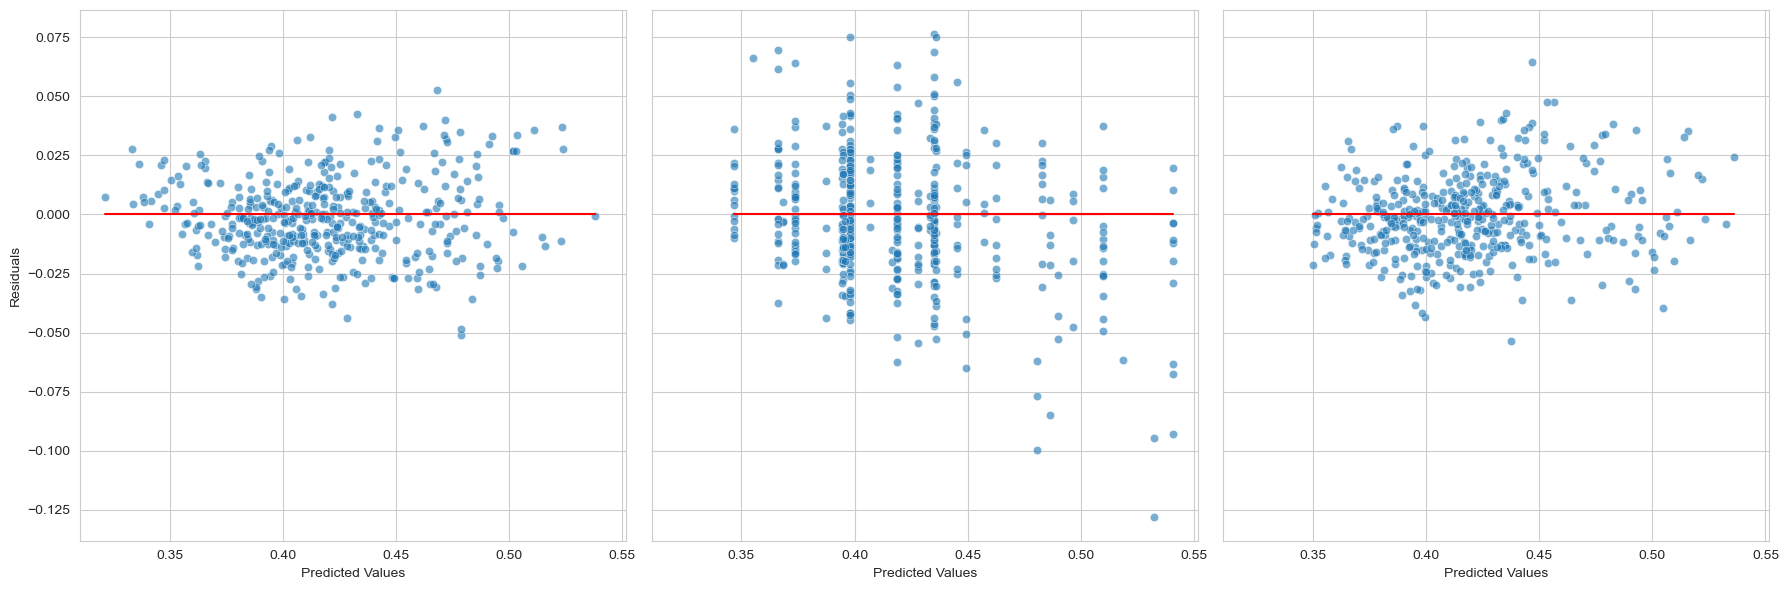

In [130]:
### Prediction visualization
## Plot the residuals of the differences between the observed and predicted values
# Ideally, the residuals should be randomly dispersed around the horizontal axis, indicating that the model's predictions are unbiased

sns.set_style("whitegrid")

def plot_residuals(ax, y_true, y_pred, title):
    residuals = y_true - y_pred
    sns.scatterplot(ax=ax, x=y_pred, y=residuals, alpha=0.6)
    sns.lineplot(ax=ax, x=y_pred, y=[0]*len(y_pred), color='red')  
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

plot_residuals(axes[0], y_test, linear_reg_test_predictions_aligned, 'Linear Regression Residuals')
plot_residuals(axes[1], y_test, decision_tree_test_predictions_aligned, 'Decision Tree Residuals')
plot_residuals(axes[2], y_test, rf_test_predictions_aligned, 'Random Forest Residuals')

plt.tight_layout()
plt.show()

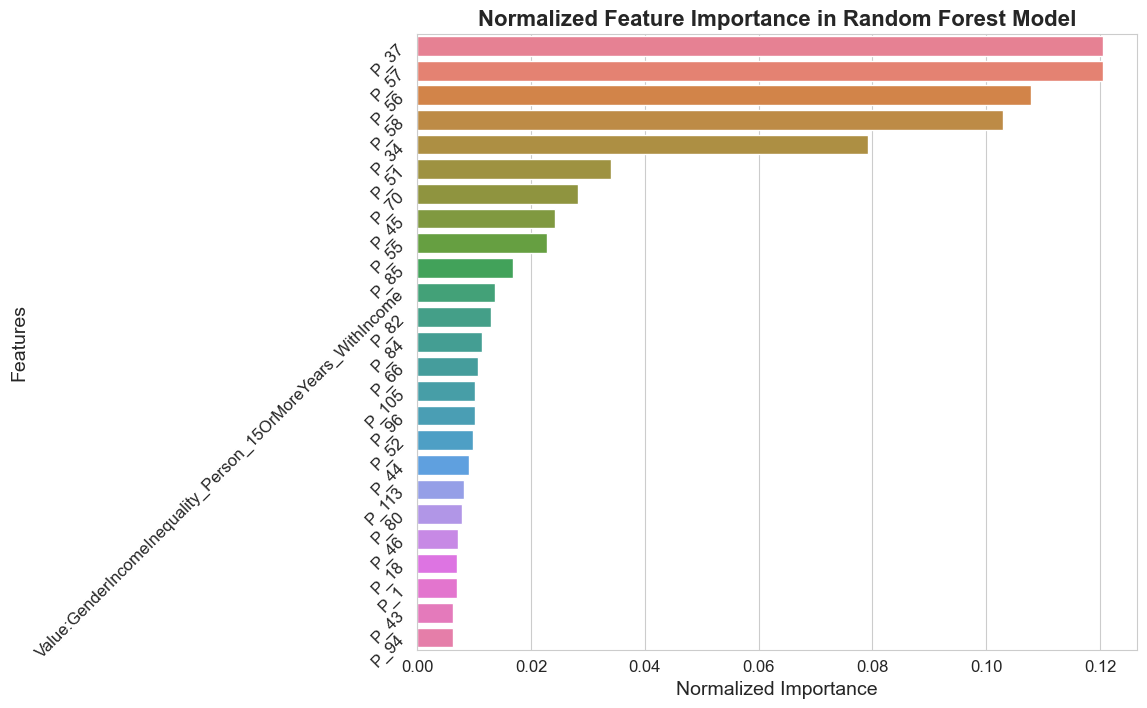

In [131]:
### Prediction visualization
## Feature Importance Plots for Random Forest 
# Since the Random Forest model performed best, understanding which features most influence the predictions is crucial
# This visualization would shed light on the underlying factors that drive intergenerational mobility

feature_importances = rf_regressor.feature_importances_
feature_importances_normalized = feature_importances / np.sum(feature_importances)
features_series = pd.Series(feature_importances_normalized, index=X_test.columns)
features_series_sorted = features_series.sort_values(ascending=False)
cumulative_importance = np.cumsum(features_series_sorted)
features_to_keep = cumulative_importance[cumulative_importance <= 0.8]
features_series_filtered = features_series_sorted.loc[features_to_keep.index]

plt.figure(figsize=(12, 8))
color_palette = sns.color_palette("husl", len(features_series_filtered))

sns.barplot(x=features_series_filtered, y=features_series_filtered.index, palette=color_palette)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=45)  # Rotate y-axis labels for better readability
plt.title('Normalized Feature Importance in Random Forest Model', fontsize=16, fontweight='bold')
plt.xlabel('Normalized Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, axis='x')
plt.subplots_adjust(left=0.3)
plt.show()

Top 5 Features:
- `P_37` Share black 2000
- `P_57` Percent of Adults That Report Fair or Poor Health (Persons 18 Years and Over) 
- `P_56` Mentally Unhealthy Days per Month (Persons 18 Years and Over)
- `P_58` Percent of Low Birthweight Births (<2.5kg)
- `P_34` Share black 2010

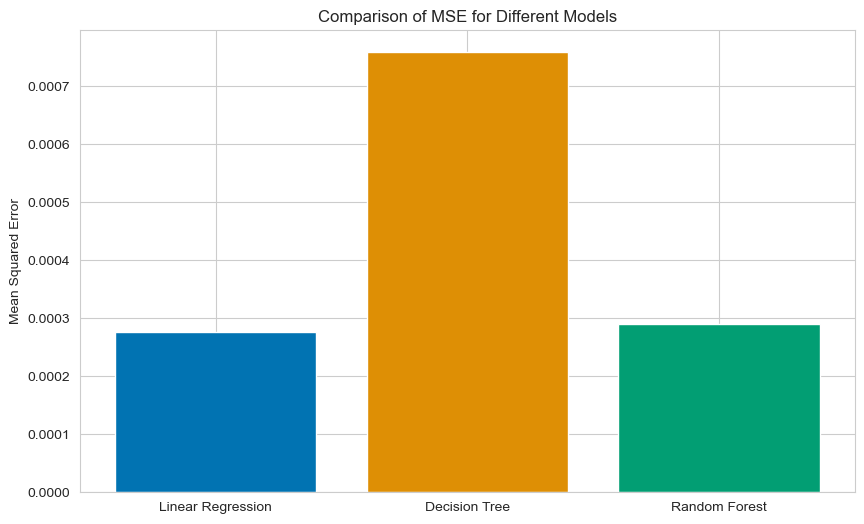

In [132]:
### Prediction visualization
## Bar Charts or Box Plots for Error Metrics
# A direct comparison of the error metrics across the models

mse_values = [mse_linear_reg_test_aligned, mse_decision_tree_test_aligned, mse_rf_test_aligned]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']

palette = sns.color_palette("colorblind", len(model_names))

plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=palette)
plt.title('Comparison of MSE for Different Models')
plt.ylabel('Mean Squared Error')
plt.show()